# Pulizia dati


Dopo aver ricevuto le traccie, è stato creato il team **Excel**len Bank, composto da Biglioli Alessandro, Motta Riccardo,
Particelli Francesca, Pozzi Andrea Chiara, Rapisarda Alice, Souza Ribeiro Mykaella.



Il passo successivo è stato quello di visionare e analizzare il csv, osservando quali elementi potevano essere eliminati e/o sistemati
per pulire il csv stesso, aiutati anche dal link che avevamo a disposizione (https://archive.ics.uci.edu/dataset/222/bank+marketing).

Per svolgere al meglio la pulizia dei dati abbiamo utilizzato power query attraverso Exel.

Dopo la pulizia, il nuovo file csv è stato caricato su github utilizzando il metodo push.



#Creazione schema ER

Il passo successivo è stato quello di creare, partendo dai nuovi dati, uno schema ER per avere anche a livello visivo una guida
nella creazione delle tabelle e le sue relazione nel database. Dopo un confronto tra i membri del team su dove posizionare i vari elementi, sono state create 6 tabelle, partendo da quelle che poi si sarebbero collegate alla tabella principale  "clienti" attraverso delle foreign key.
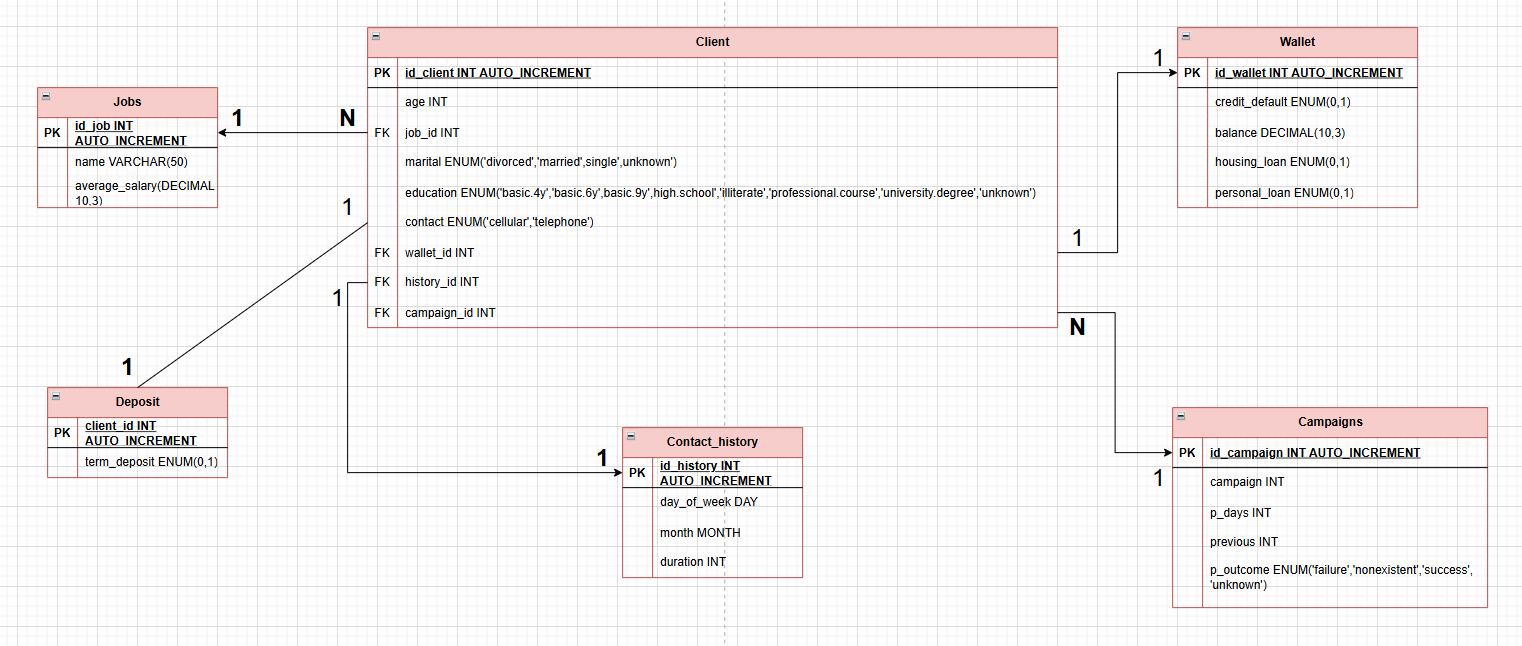

#Pulizia del dataframe e creazione delle tabelle nel database

Durante l'analisi del giorno prima ci siamo resi conto che oltre a eliminare dei dati, se ne potevano aggiungere altri. Così abbiamo
aggiunto dei nuovi dati nella sezione "jobs", creando così un nuovo csv, che poi è stato successivamente caricato su github
come quello precedente utilizzando lo stesso metodo del push,
e che è stato utilizzato per la creazione delle tabelle e l'inserimento di dati fatto successivamente. E' stato poi modificato anche il diagramma ER


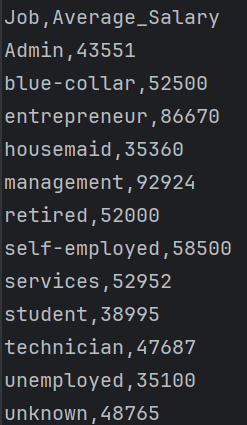


Con i dati completi è stato possibile creare su phpmyadmin il database e le relative tabelle con codice Python attraverso Pycharm, utilizzando il metodo open per leggere i csv, per poi recuperare direttamente i dati dai file coinvolti e inserirli all'interno del database

In [ ]:
import mysql.connector
from mysql.connector import Error

try:
    # Connessione al database
    conn = mysql.connector.connect(
        host="localhost",
        user="root",  # Inserisci il tuo nome utente
        password="",  # Inserisci la tua password
        database="bank_marketing"  # Inserisci il nome del tuo database
    )

    if conn.is_connected():
        print("Connesso al database.")

    # Creazione di un cursore
    cursor = conn.cursor()

    # Creazione della tabella jobs
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS jobs (
            id_job INT AUTO_INCREMENT PRIMARY KEY,
            nome VARCHAR(100) NOT NULL,
            average_salary DECIMAL(10,2) NOT NULL
        );
    """)
    print("Tabella 'jobs' creata con successo.")

    # Creazione della tabella deposit
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS deposit (
            id_deposit INT AUTO_INCREMENT PRIMARY KEY,
            term_deposit ENUM('0', '1') NOT NULL
        );
    """)
    print("Tabella 'deposit' creata con successo.")

    # Creazione della tabella contact_history
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS contact_history (
            id_history INT AUTO_INCREMENT PRIMARY KEY,
            day_of_week INT NOT NULL,
            month CHAR(5) NOT NULL,
            duration INT NOT NULL
        );
    """)
    print("Tabella 'contact_history' creata con successo.")

    # Creazione della tabella campaigns
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS campaigns (
            id_campaign INT AUTO_INCREMENT PRIMARY KEY,
            campaign INT NOT NULL,
            p_days INT NOT NULL,
            previous INT NOT NULL,
            p_outcome ENUM("failure", "unknown", "nonexistent", "success", "other")
        );
    """)
    print("Tabella 'campaigns' creata con successo.")

    # Creazione della tabella wallet
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS wallet (
            id_wallet INT AUTO_INCREMENT PRIMARY KEY,
            credit_default ENUM('0', '1') NOT NULL,
            balance DECIMAL(10, 2) NOT NULL,
            housing_loan ENUM('0', '1') NOT NULL,
            personal_loan ENUM('0', '1') NOT NULL
        );
    """)
    print("Tabella 'wallet' creata con successo.")

    # Creazione della tabella client con ON DELETE CASCADE
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS client (
            id_client INT AUTO_INCREMENT PRIMARY KEY,
            age INT NOT NULL,
            job_id INT NOT NULL,
            marital ENUM("divorced", "married", "single", "unknown") NOT NULL,
            education ENUM("primary", "secondary", "tertiary", "unknown", "other") NOT NULL,
            contact ENUM("cellular", "telephone", "unknown") NOT NULL,
            wallet_id INT NOT NULL,
            history_id INT NOT NULL,
            campaign_id INT NOT NULL,
            deposit_id INT NOT NULL,
            FOREIGN KEY (job_id) REFERENCES jobs(id_job),
            FOREIGN KEY (wallet_id) REFERENCES wallet(id_wallet) ON DELETE CASCADE,
            FOREIGN KEY (history_id) REFERENCES contact_history(id_history) ON DELETE CASCADE,
            FOREIGN KEY (campaign_id) REFERENCES campaigns(id_campaign) ON DELETE CASCADE,
            FOREIGN KEY (deposit_id) REFERENCES deposit(id_deposit) ON DELETE CASCADE
        );
    """)
    print("Tabella 'client' creata con successo.")

    # Commit delle modifiche
    conn.commit()

except Error as e:
    print(f"Errore durante la creazione delle tabelle: {e}")

finally:
    # Chiusura della connessione
    if conn.is_connected():
        cursor.close


#Discord


E' stato poi creato un gruppo discord per condividere tutti i codici e i file cosicchè tutti i membri del team avessero a portata di mano il materiale necessario senza sovraccaricare di materiale superfluo o errato github e renderlo anche più leggibile, organizzato e meno confusionario per una persona esterna nel caso avesse bisogno di interfacciarsi col nostro lavoro.

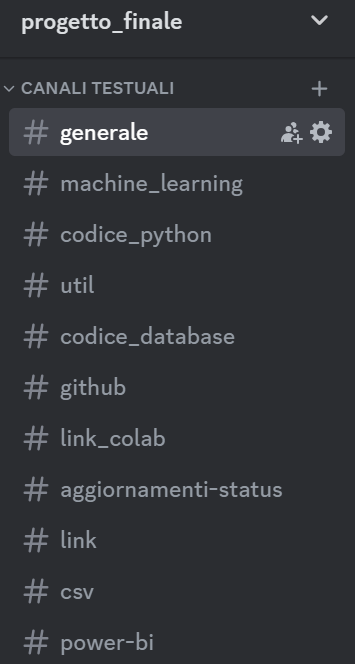

# Inserimento dei dati nel database

Successivamente è stato completato l'inserimento dei dati all'interno delle tabelle, utilizando la funzione "esegui_query_parametrizzata_many", creando poi un file unico contenente tutte le insert svolte dai vari componenti del gruppo.
Durante questo passaggio ci siamo resi conto di aver fatto qualche errore durante la creazione delle tabelle che impediva il corretto inserimento dei dati. Con l'aiuto e il supporto di tutti i membri dei team e dei docenti si è poi giunti alla soluzione corretta

In [ ]:
from tqdm import tqdm
import csv

from funzioni_utili import esegui_query_parametrizzata_many, recupera_dati_completi_parametrizzata
from funzioni_utili import esegui_query

# Insert jobs
with open('average_salary.csv', encoding='utf-8') as f:
    lettore = csv.reader(f, delimiter=',')
    f.readline()
    lista_inserimento = []
    lista_lavori = []
    for riga in lettore:
        lavoro = riga[0]
        if lavoro not in lista_lavori:
            lista_lavori.append(lavoro)
            query = f"""INSERT INTO jobs(nome, average_salary) VALUES (%s, %s)"""
            valore = (riga[0], riga[1])
            lista_inserimento.append(valore)

    esegui_query_parametrizzata_many(query,lista_inserimento)

esegui_query("SET GLOBAL max_allowed_packet = 1073741824;")

# Insert client, deposit, campaigns, contact_history, wallet
with open('Bank_Marketing_1.csv', encoding='utf-8') as f:
    lettore = csv.reader(f, delimiter=';')
    f.readline()
    query = f"""INSERT INTO client(id_client, age, job_id, marital, education, contact, wallet_id, history_id, campaign_id, deposit_id) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"""

    listaClienti = []
    listaWallet = []
    listaCampaign = []
    listaDeposit = []
    listaHistory = []
    diz_lavori = {}
    id = 1

    for riga in tqdm(lettore):
        job = riga[1]
        wallet = (riga[4], riga[5], riga[6], riga[7])
        campaign = (riga[12], riga[13], riga[14], riga[15])
        deposit = (riga[16],)
        history = (riga[9], riga[10], riga[11])
        id = str(id)
        listaWallet.append((id,) + wallet)
        listaDeposit.append((id,) + deposit)
        listaCampaign.append((id,) + campaign)
        listaHistory.append((id,) + history)
        id = int(id)
        if job in diz_lavori:
            job_id = diz_lavori[job]
        else:
            job_id = recupera_dati_completi_parametrizzata(f"""SELECT id_job FROM jobs
                    WHERE nome = %s""", (job,))[0][0]
            diz_lavori[job] = job_id

        valori = (id, riga[0], job_id, riga[2], riga[3], riga[8], id, id, id, id)
        listaClienti.append(valori)
        id += 1

    queryWallet = f"""INSERT INTO wallet(id_wallet , credit_default, balance, housing_loan, personal_loan) VALUES (%s, %s, %s, %s, %s)"""
    esegui_query_parametrizzata_many(queryWallet, listaWallet)
    queryDeposit = f"""INSERT INTO deposit(id_deposit, term_deposit) VALUES (%s, %s)"""
    esegui_query_parametrizzata_many(queryDeposit, listaDeposit)
    queryCampaign = f"""INSERT INTO campaigns(id_campaign, campaign, p_days, previous, p_outcome) VALUES (%s, %s, %s, %s, %s)"""
    esegui_query_parametrizzata_many(queryCampaign, listaCampaign)
    queryHistory = f"""INSERT INTO contact_history(id_history, day_of_week, month, duration) VALUES (%s, %s, %s, %s)"""
    esegui_query_parametrizzata_many(queryHistory, listaHistory)
    esegui_query_parametrizzata_many(query, listaClienti)


#Power Bi

Con i dati raccolti è stato possibile creare dei grafici per rendere visibili alcuni dei dati che abbiamo reputato più rilevanti, evidenziando chi tra i clienti possiede un deposito, andando ad analizzare come età, lavoro e livello di istruzione potessero influenzare questo dato.

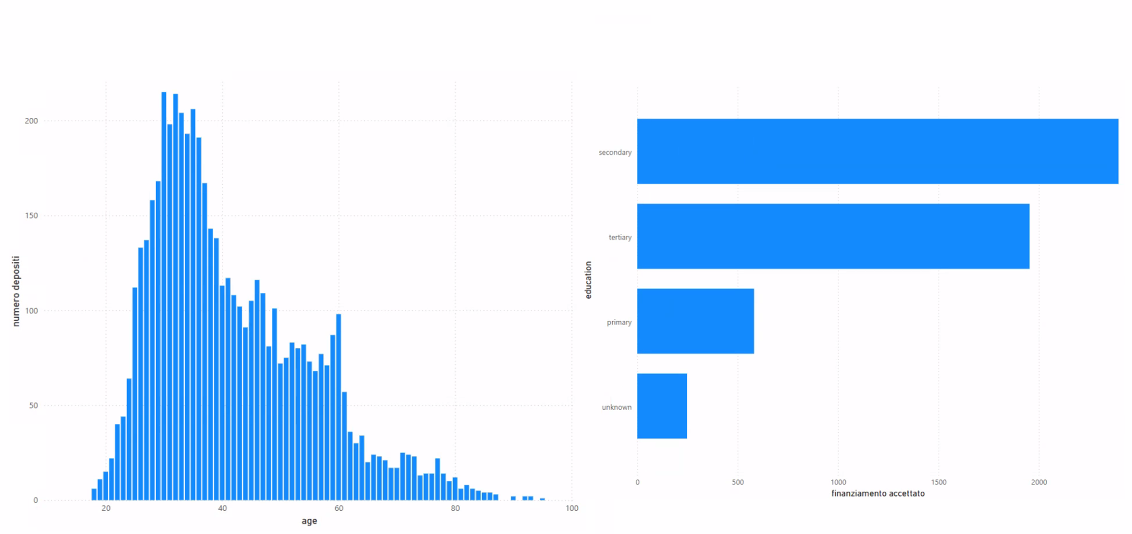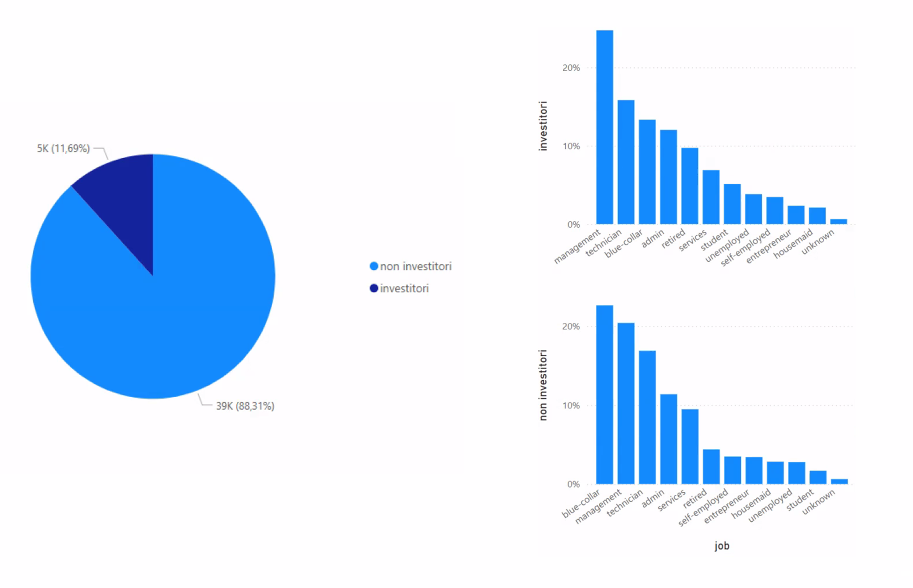

#Machine learning

Con l'utilizzo di un codice di machine learning ci siamo occupati di analizzare un dataset di marketing bancario cercando di **prevedere se un cliente sarà in grado di sottoscrivere un deposito bancario** o meno.
Tramite SMOTE, per generare dati sintetici della classe minoritaria, e codifiche one hot, per trasformare le variabili categoriche in numeriche abbiamo allenato un modello con **classificatore Random Forest**.

Di seguito poi vengono visualizzati i diversi grafici che ci permettono di vedere le previsioni del modello tramite una matrice di confusione o un grafico a barre e le feature più utilizzate:

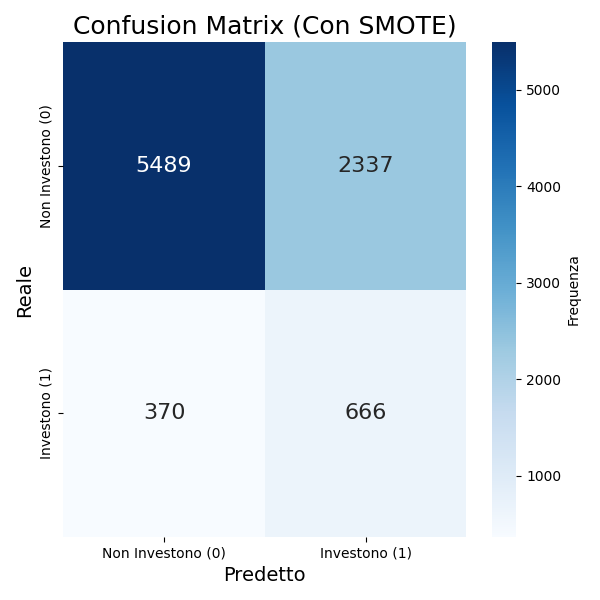

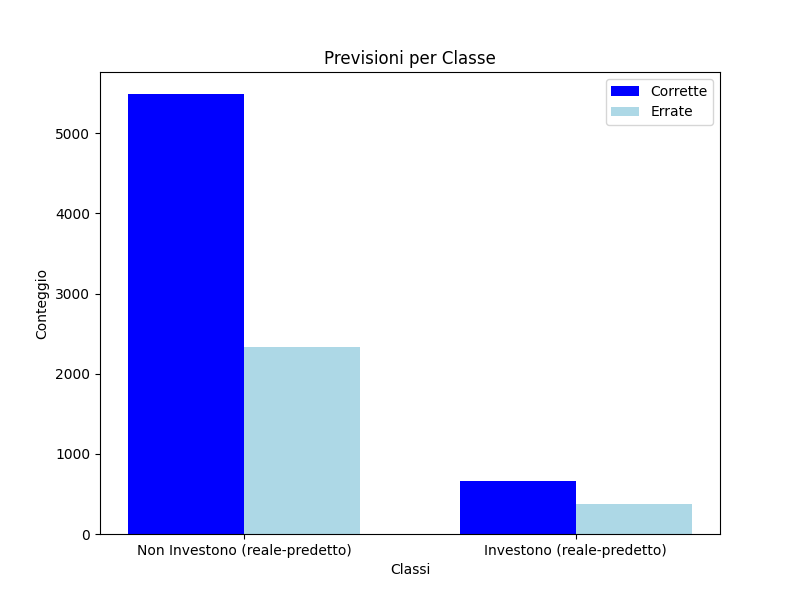

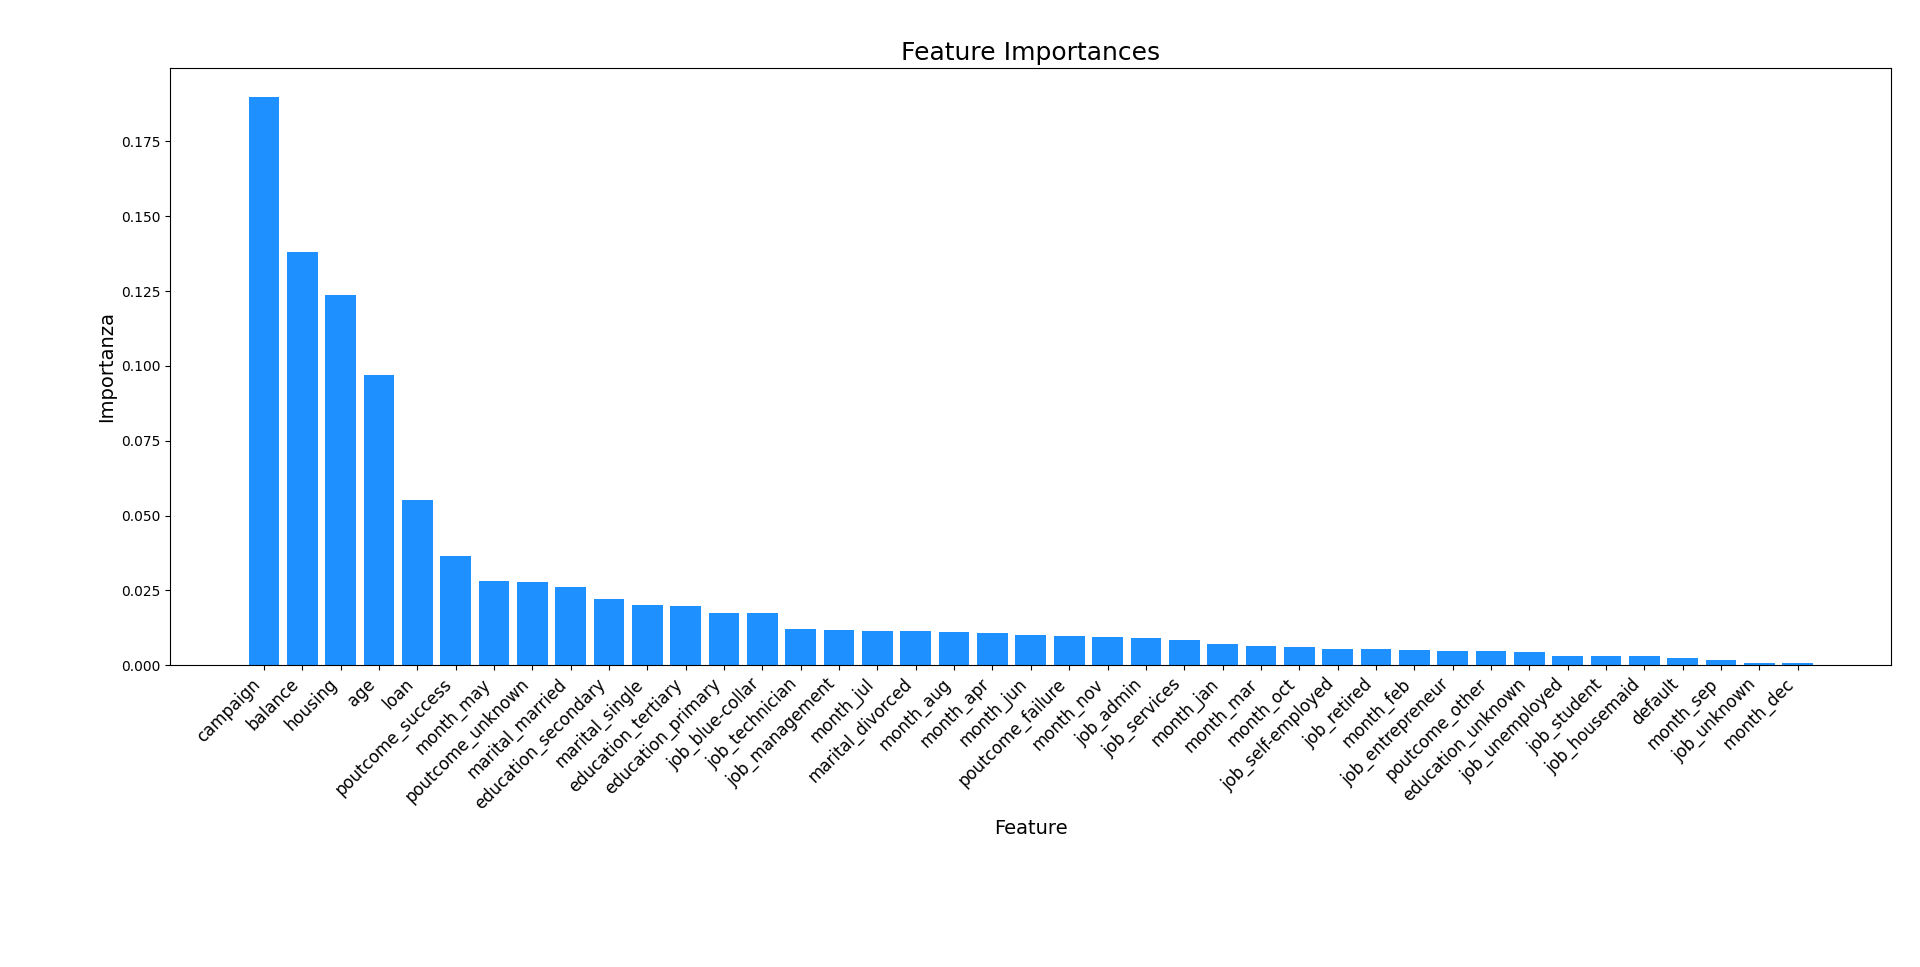

#### Codice per la previsione🖥️

In [ ]:
# --- IMPORT SECTION ---
# Importiamo tutte le librerie necessarie per il nostro lavoro
import joblib
import numpy as np  # Per operazioni matematiche avanzate, come array e manipolazione dei dati
import pandas as pd  # Per la gestione dei dati in formato tabellare (DataFrame)
import matplotlib.pyplot as plt  # Per creare grafici e visualizzazioni
from sklearn.model_selection import train_test_split  # Per dividere il dataset in training e test set
from sklearn.preprocessing import StandardScaler  # Per la normalizzazione dei dati
from sklearn.ensemble import RandomForestClassifier  # Modello di Random Forest
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, f1_score  # Per valutare il modello
import seaborn as sns  # Per visualizzazioni più avanzate (come heatmap)
from imblearn.over_sampling import SMOTE  # Per la gestione del bilanciamento delle classi (oversampling)
from imblearn.pipeline import Pipeline  # Per applicare un pipeline di preprocessing
import os  # Per impostare variabili di ambiente, utile per evitare warning

# Impostiamo il numero massimo di core da utilizzare per evitare avvisi sul consumo eccessivo di risorse
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

# --- MAIN CODE ---
# Carichiamo il dataset dal file CSV con separatore ";"
data = pd.read_csv('Bank_Marketing_1.csv', sep=";")

# Visualizziamo la distribuzione delle classi nella colonna target "deposit" (0=No, 1=Sì)
print("Distribuzione delle classi nella colonna target:")
print(data.iloc[:, -1].value_counts())

# Rimuoviamo le colonne che non sono rilevanti per il nostro modello
data = data.drop(data.columns[[8, 9, 11, 13, 14]], axis=1)

# Separiamo le variabili indipendenti (features) e la variabile dipendente (target)
X = data.iloc[:, :-1]  # Tutte le colonne tranne l'ultima
y = data.iloc[:, -1].values  # Solo l'ultima colonna che rappresenta il target (deposit)

# Suddividiamo il dataset in un training set (80%) e un test set (20%) con stratificazione per mantenere la stessa distribuzione di classi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

# Applichiamo la codifica one-hot per le variabili categoriche (trasformandole in variabili numeriche binarie)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Mostriamo le prime 5 righe del dataset per una rapida ispezione
print(f"\nEcco le prime 5 righe del dataset:\n{data.head()}")

# Normalizziamo le variabili numeriche per far sì che abbiano media 0 e deviazione standard 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Eseguiamo il fit sul training set
X_test_scaled = scaler.transform(X_test)  # Applicamo la stessa trasformazione sul test set

# --- SMOTE (oversampling per bilanciare le classi) ---
# SMOTE genera dati sintetici per bilanciare le classi nel training set
smote = SMOTE(sampling_strategy=1.0, random_state=101)  # Vogliamo un rapporto di 1.0 tra la classe minoritaria e la maggioritaria

# Creiamo un training set bilanciato usando SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Definiamo i pesi delle classi per il modello, aumentando il peso della classe minoritaria (class 1 = 'Sì')
class_weights = {0: 1, 1: 3.5}  # Peso più alto per la classe minoritaria (Sì)

# --- Creazione e Addestramento del Modello Random Forest ---
# Random Forest è un modello di machine learning che utilizza una foresta di alberi decisionali
model = RandomForestClassifier(
    n_estimators=100,        # Numero di alberi da usare nel modello
    max_depth=20,            # Profondità massima di ogni albero
    min_samples_split=5,     # Numero minimo di campioni per fare uno split in un albero
    min_samples_leaf=4,      # Numero minimo di campioni per una foglia
    max_features="sqrt",     # Consideriamo la radice quadrata del numero di feature per ogni albero
    class_weight=class_weights, # Gestiamo il bilanciamento delle classi usando i pesi definiti
    random_state=101         # Per garantire la riproducibilità dei risultati
)

# Addestriamo il modello con il training set bilanciato
model.fit(X_train_resampled, y_train_resampled)

# --- Previsione e Valutazione del Modello ---
# Previsione sul test set
y_pred = model.predict(X_test_scaled)

# Calcoliamo le metriche di valutazione per il modello
accuracy = accuracy_score(y_test, y_pred)  # Percentuale di predizioni corrette
f1 = f1_score(y_test, y_pred)  # F1-score, bilancia precision e recall
auc_score = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])  # AUC-ROC per misurare la qualità del modello

# Stampa dei risultati
print(f"\nL'accuratezza del modello è: {accuracy * 100:.2f} %")

# Report di classificazione per valutare precision, recall e f1-score per ogni classe
print(f"\nClassification report:\n{classification_report(y_test, y_pred)}")

# --- Visualizzazione della Confusion Matrix ---
# La confusion matrix ci permette di vedere quante predizioni sono state corrette o errate per ciascuna classe
conf_matrix = confusion_matrix(y_test, y_pred)

# Creiamo una heatmap per visualizzare la confusion matrix
plt.figure(figsize=(6, 6))

# Creazione della heatmap con una palette di colori più vivace
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Investono (0)', 'Investono (1)'],
            yticklabels=['Non Investono (0)', 'Investono (1)'], annot_kws={"size": 16}, cbar_kws={'label': 'Frequenza'})

# Titolo migliorato
plt.title('Confusion Matrix (Con SMOTE)', fontsize=18)

# Etichette per gli assi
plt.xlabel('Predetto', fontsize=14)
plt.ylabel('Reale', fontsize=14)

# Aggiungi un padding per evitare sovrapposizione delle etichette
plt.tight_layout()

# Mostra il grafico
plt.show()

# --- Visualizzazione dell'Importanza delle Feature ---
# Gli alberi decisionali della Random Forest ci permettono di capire quali feature sono più importanti per fare le previsioni
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))

# Titolo del grafico
plt.title('Feature Importances', fontsize=18)

# Grafico a barre con l'importanza delle feature
plt.bar(range(X_train_scaled.shape[1]), importances[indices], align='center', color='dodgerblue')

# Etichette per le feature con rotazione
plt.xticks(range(X_train_scaled.shape[1]), X_train.columns[indices], rotation=45, ha='right', fontsize=12)

# Etichette per l'asse y e x
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importanza', fontsize=14)

# Mostra il grafico
plt.tight_layout()  # Aggiunge spazio per etichette più lunghe
plt.show()

# --- Visualizzazione delle Predizioni Uniche ---
# Verifichiamo quante predizioni corrette ed errate sono state fatte
print("Predizioni corrette ed errate che sono state fatte:", np.unique(y_pred, return_counts=True))

# --- Visualizzazione delle Previsioni Corrette ed Errate ---
# Visualizziamo un grafico che mostra quante predizioni sono corrette e quante errate per ciascuna classe
labels = ['Non Investono (reale-predetto)', 'Investono (reale-predetto)']
correct_predictions = [np.sum((y_test == 0) & (y_pred == 0)), np.sum((y_test == 1) & (y_pred == 1))]
incorrect_predictions = [np.sum((y_test == 0) & (y_pred == 1)), np.sum((y_test == 1) & (y_pred == 0))]

# Creiamo un grafico a barre per le previsioni corrette ed errate
x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35

ax.bar(x - bar_width / 2, correct_predictions, bar_width, label='Corrette', color=['blue', 'blue'])
ax.bar(x + bar_width / 2, incorrect_predictions, bar_width, label='Errate', color=['lightblue', 'lightblue'])

ax.set_xlabel('Classi')
ax.set_ylabel('Conteggio')
ax.set_title('Previsioni per Classe')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

joblib.dump(model, 'random_forest_model.pkl')  # Salva il modello
joblib.dump(scaler, 'scaler.pkl')  # Salva lo scaler
joblib.dump(X_train.columns, 'columns.pkl')  # Salva le colonne

# # --- Previsione per un Nuovo Cliente ---
# # Creiamo un esempio di un nuovo cliente per vedere come il modello fa una previsione
# df_nuovo_cliente = pd.DataFrame([[
#     # 58, 'management', 'married', 'tertiary', 0, 2143, 1, 0, 'may', 1, 'unknown' # -> è un NO reale
#     # 59, 'admin', 'married', 'secondary', 0, 2343, 1, 0, 'may', 0, 'unknown' # -> è un SI reale
# ]], columns=[
#     "age", "job", "marital", "education", "default", "balance", "housing", "loan", "month", "campaign", "poutcome"
# ])
#
# # Applichiamo la codifica one-hot per questo nuovo esempio
# df_nuovo_cliente = pd.get_dummies(df_nuovo_cliente)
#
# # Allineiamo le colonne con il training set (aggiungiamo colonne mancanti e le ordiniamo)
# df_nuovo_cliente = df_nuovo_cliente.reindex(columns=X_train.columns)
#
# # Scala il nuovo esempio
# nuovo_cliente_scaled = scaler.transform(df_nuovo_cliente)
#
# # Previsione per il nuovo cliente
# previsione = model.predict(nuovo_cliente_scaled)
#
# # Stampa del risultato della previsione
# if previsione[0] == 1:
#     print("Il modello prevede che il cliente risponderà: Sì")
# else:
#     print("Il modello prevede che il cliente risponderà: No")

# Creazione web con app.py

Con la creazione di un'applicazione web utilizzando Python (attraverso il framework Flask), abbiamo implementato un'interfaccia front-end in HTML e CSS, integrata direttamente nel codice Python.
Abbiamo collegato il database all'applicazione, in modo tale che tutti i calcoli fatti vengano presi direttamente dai dati contenuti nel database.

Questa applicazione funziona come una sorta di "banca calcolatrice" e offre le seguenti funzionalità principali:
1. aggiungere clienti
2. eliminare clienti
3. cercare clienti
4. previsione








#Home page


Appena si entra nel sito, viene chiesto all'utente di fare il login, inserendo username e password.

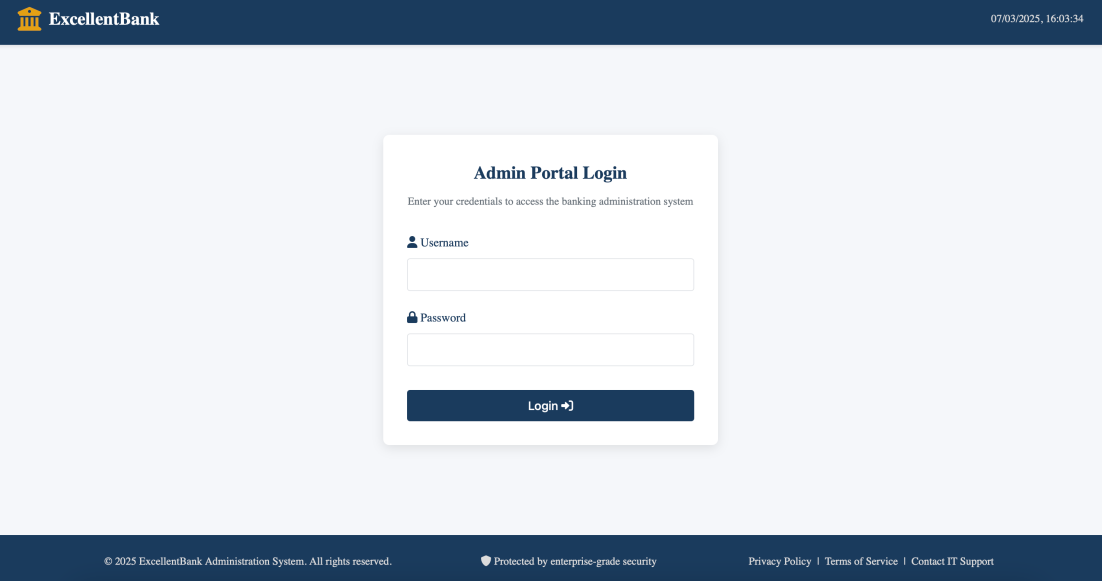

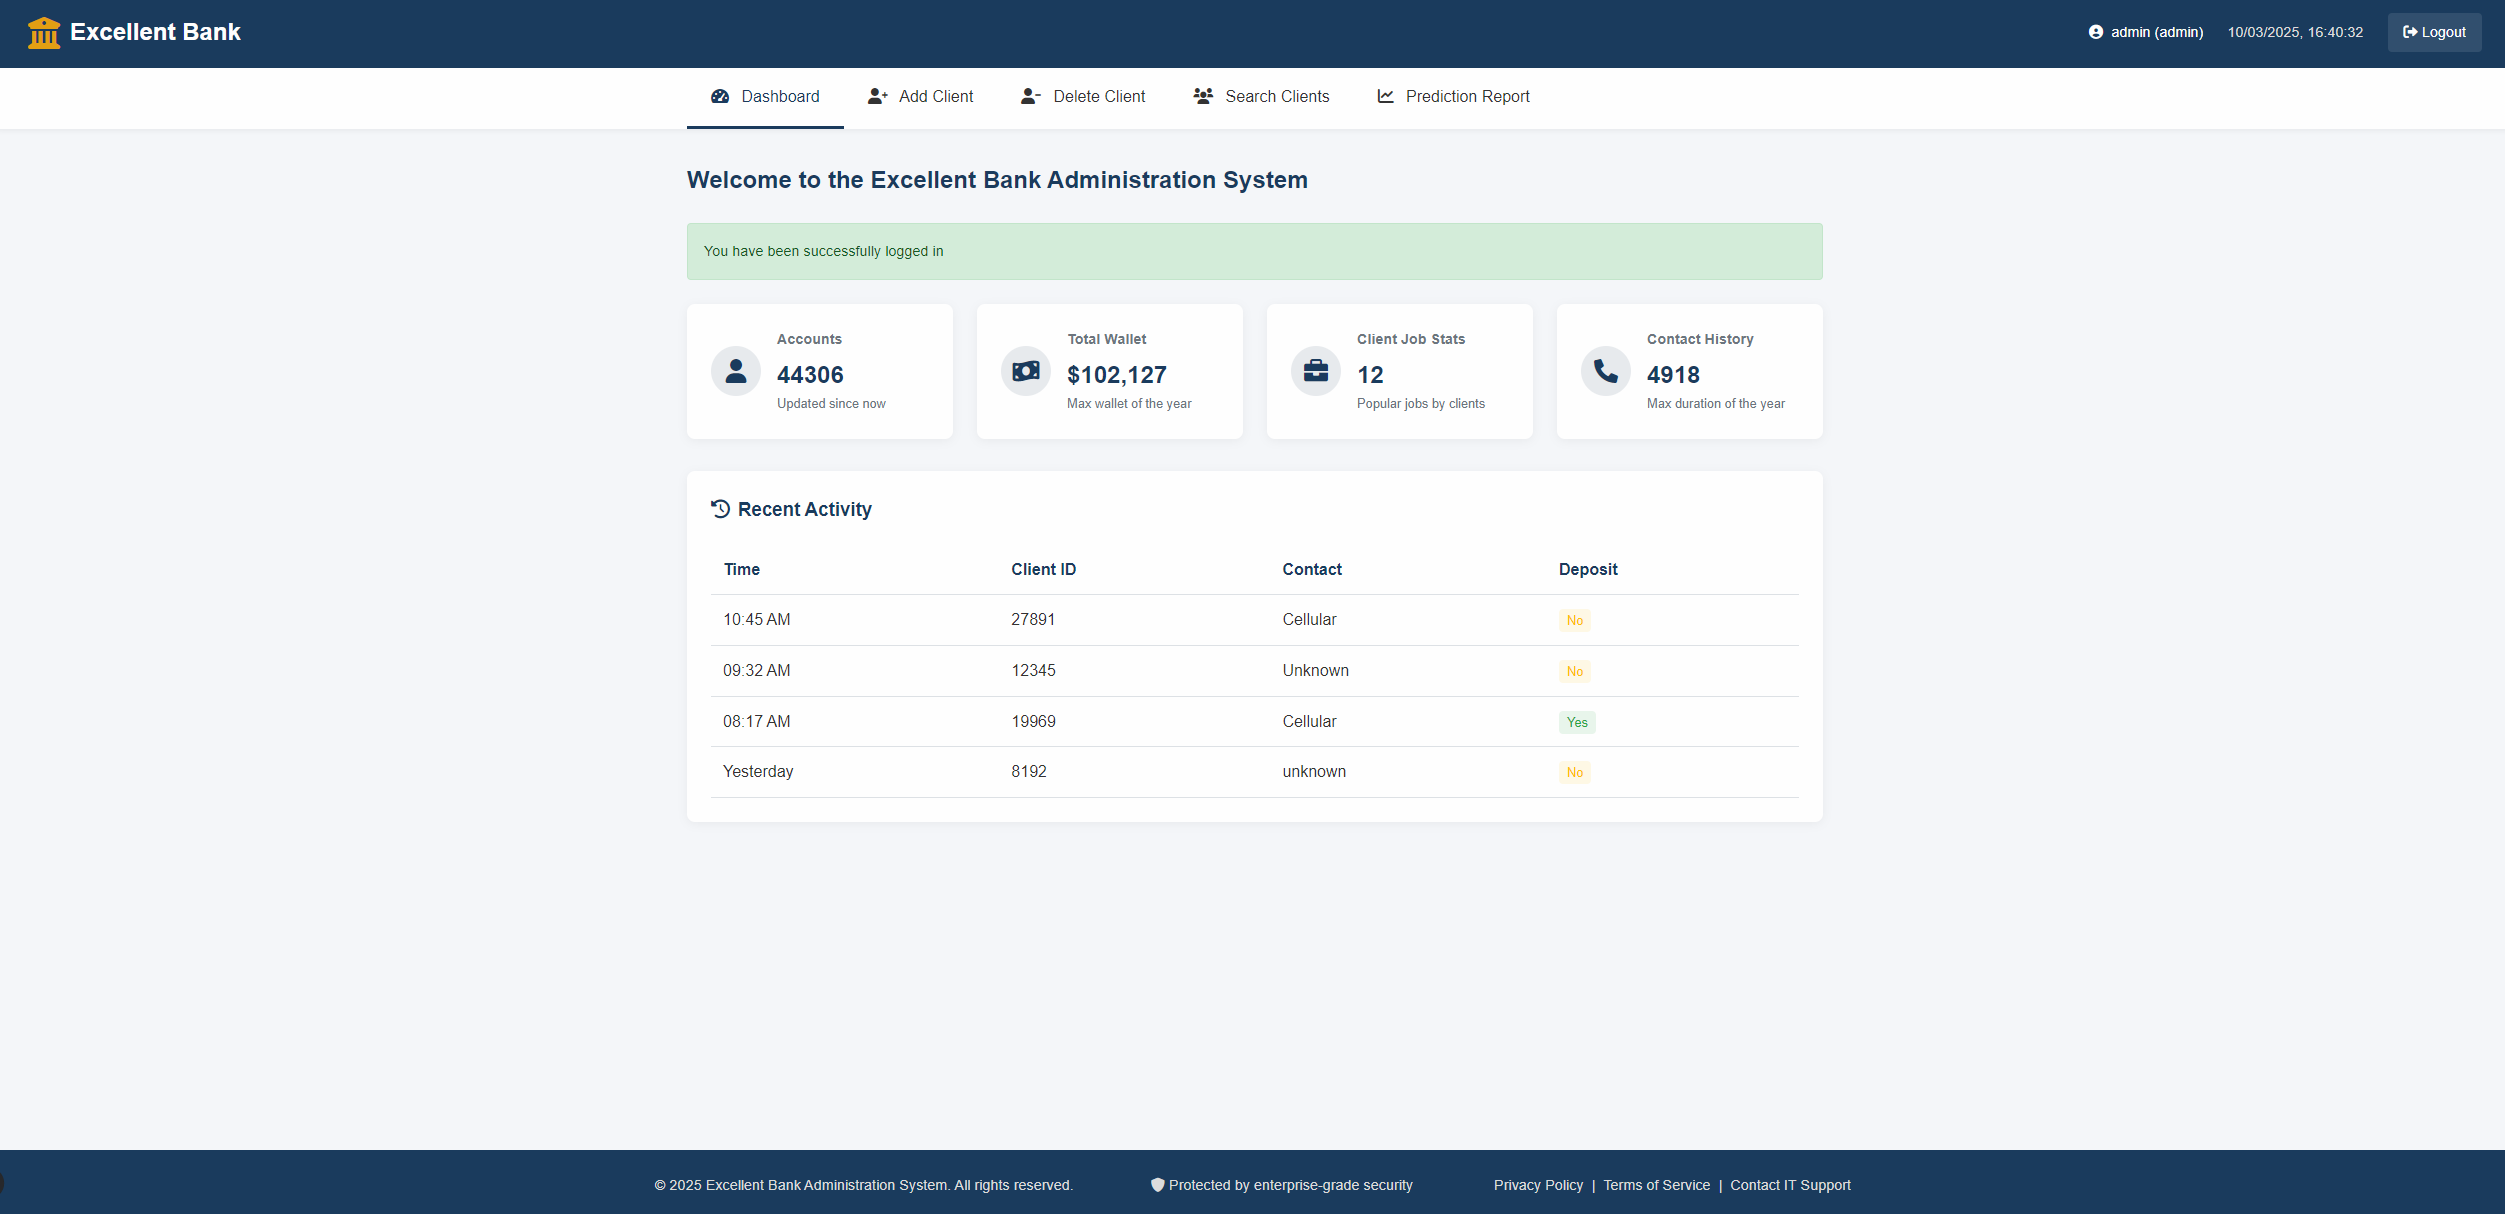

Una volta confermate le credenziali, si accede al sito, dove è possibile aggiungere, eliminare, trovare i clienti e avere una previsione sulla probabilità che il cliente effettui un deposito, e di conseguenza se la banca possa invesire con esso.

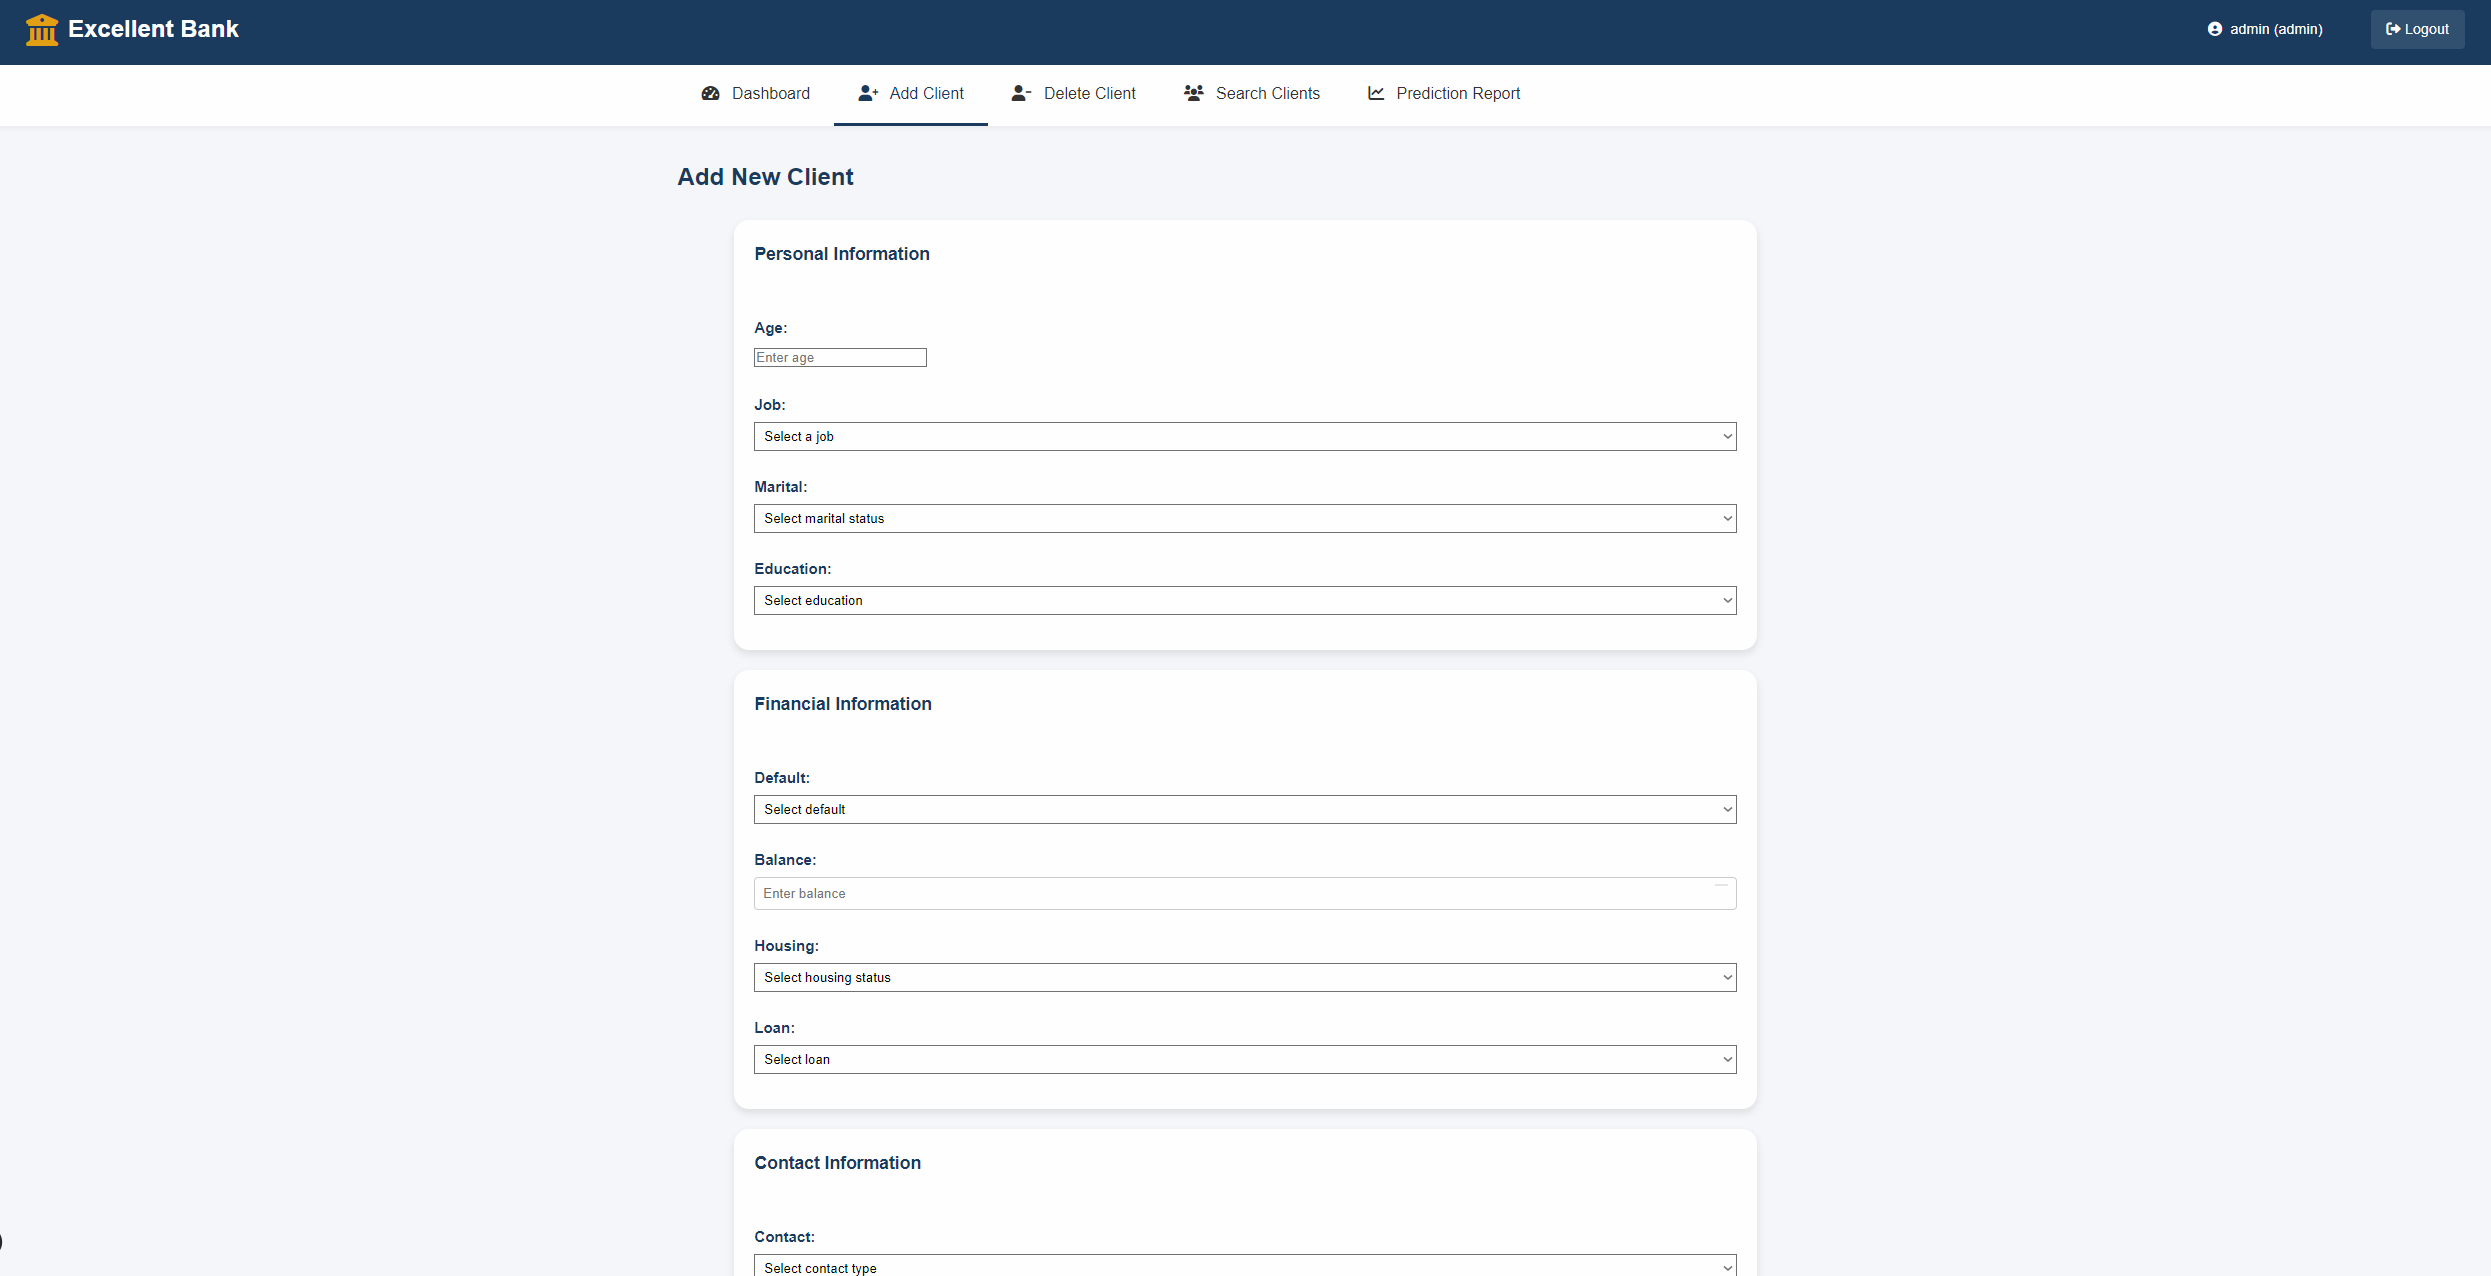

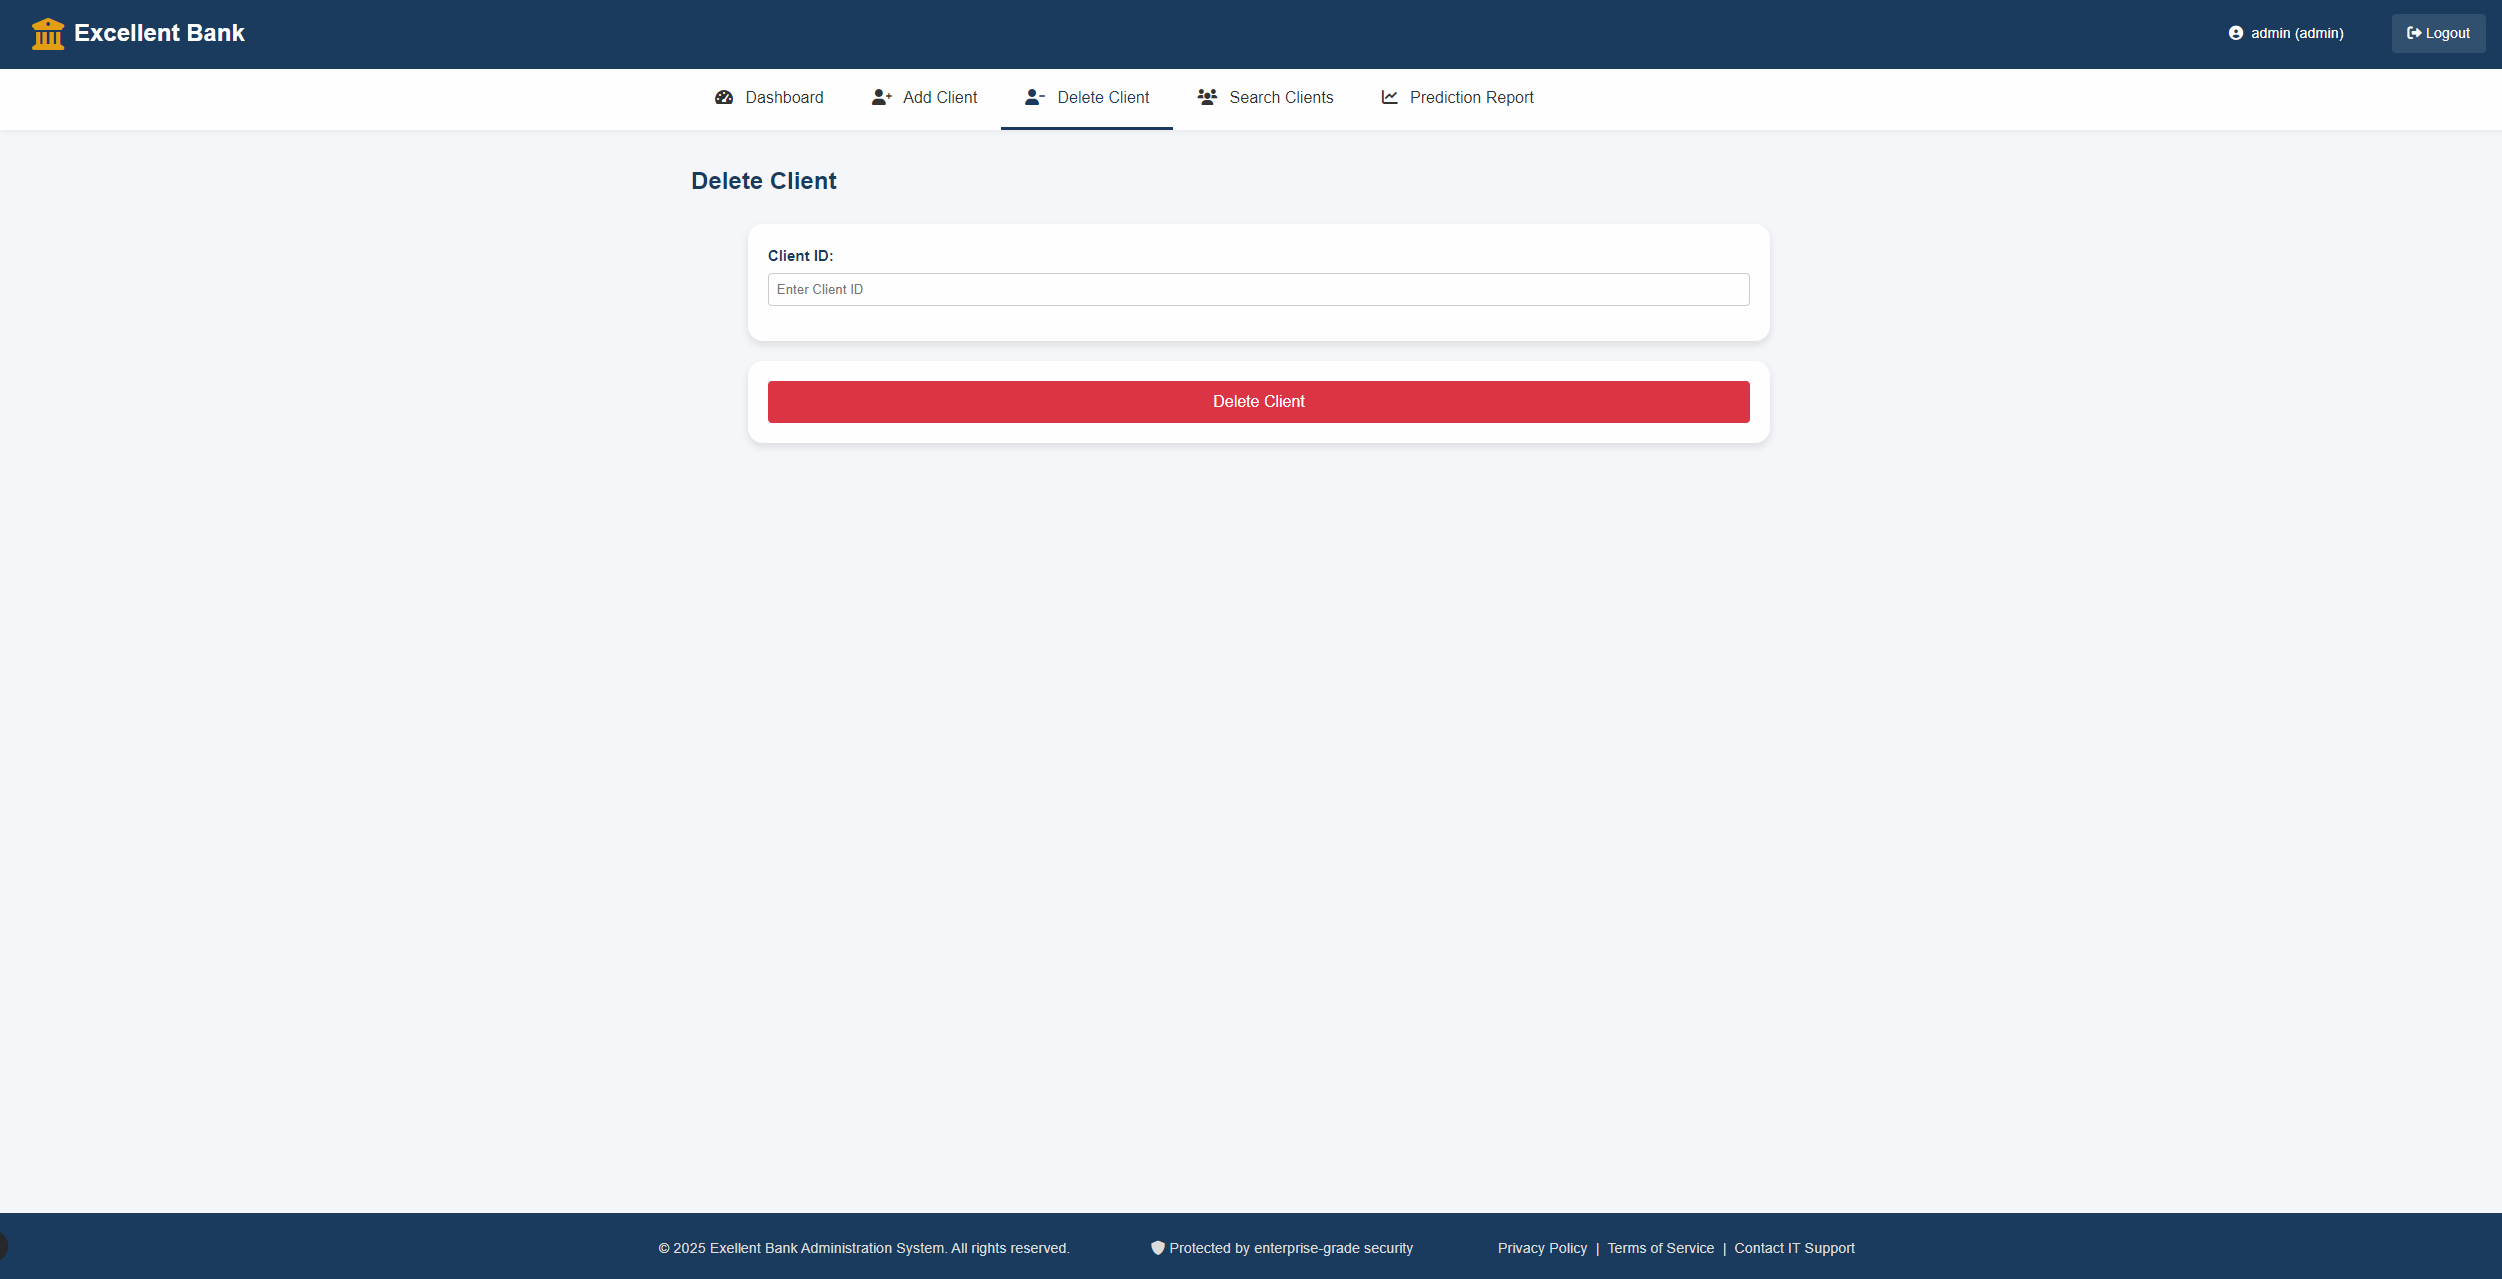

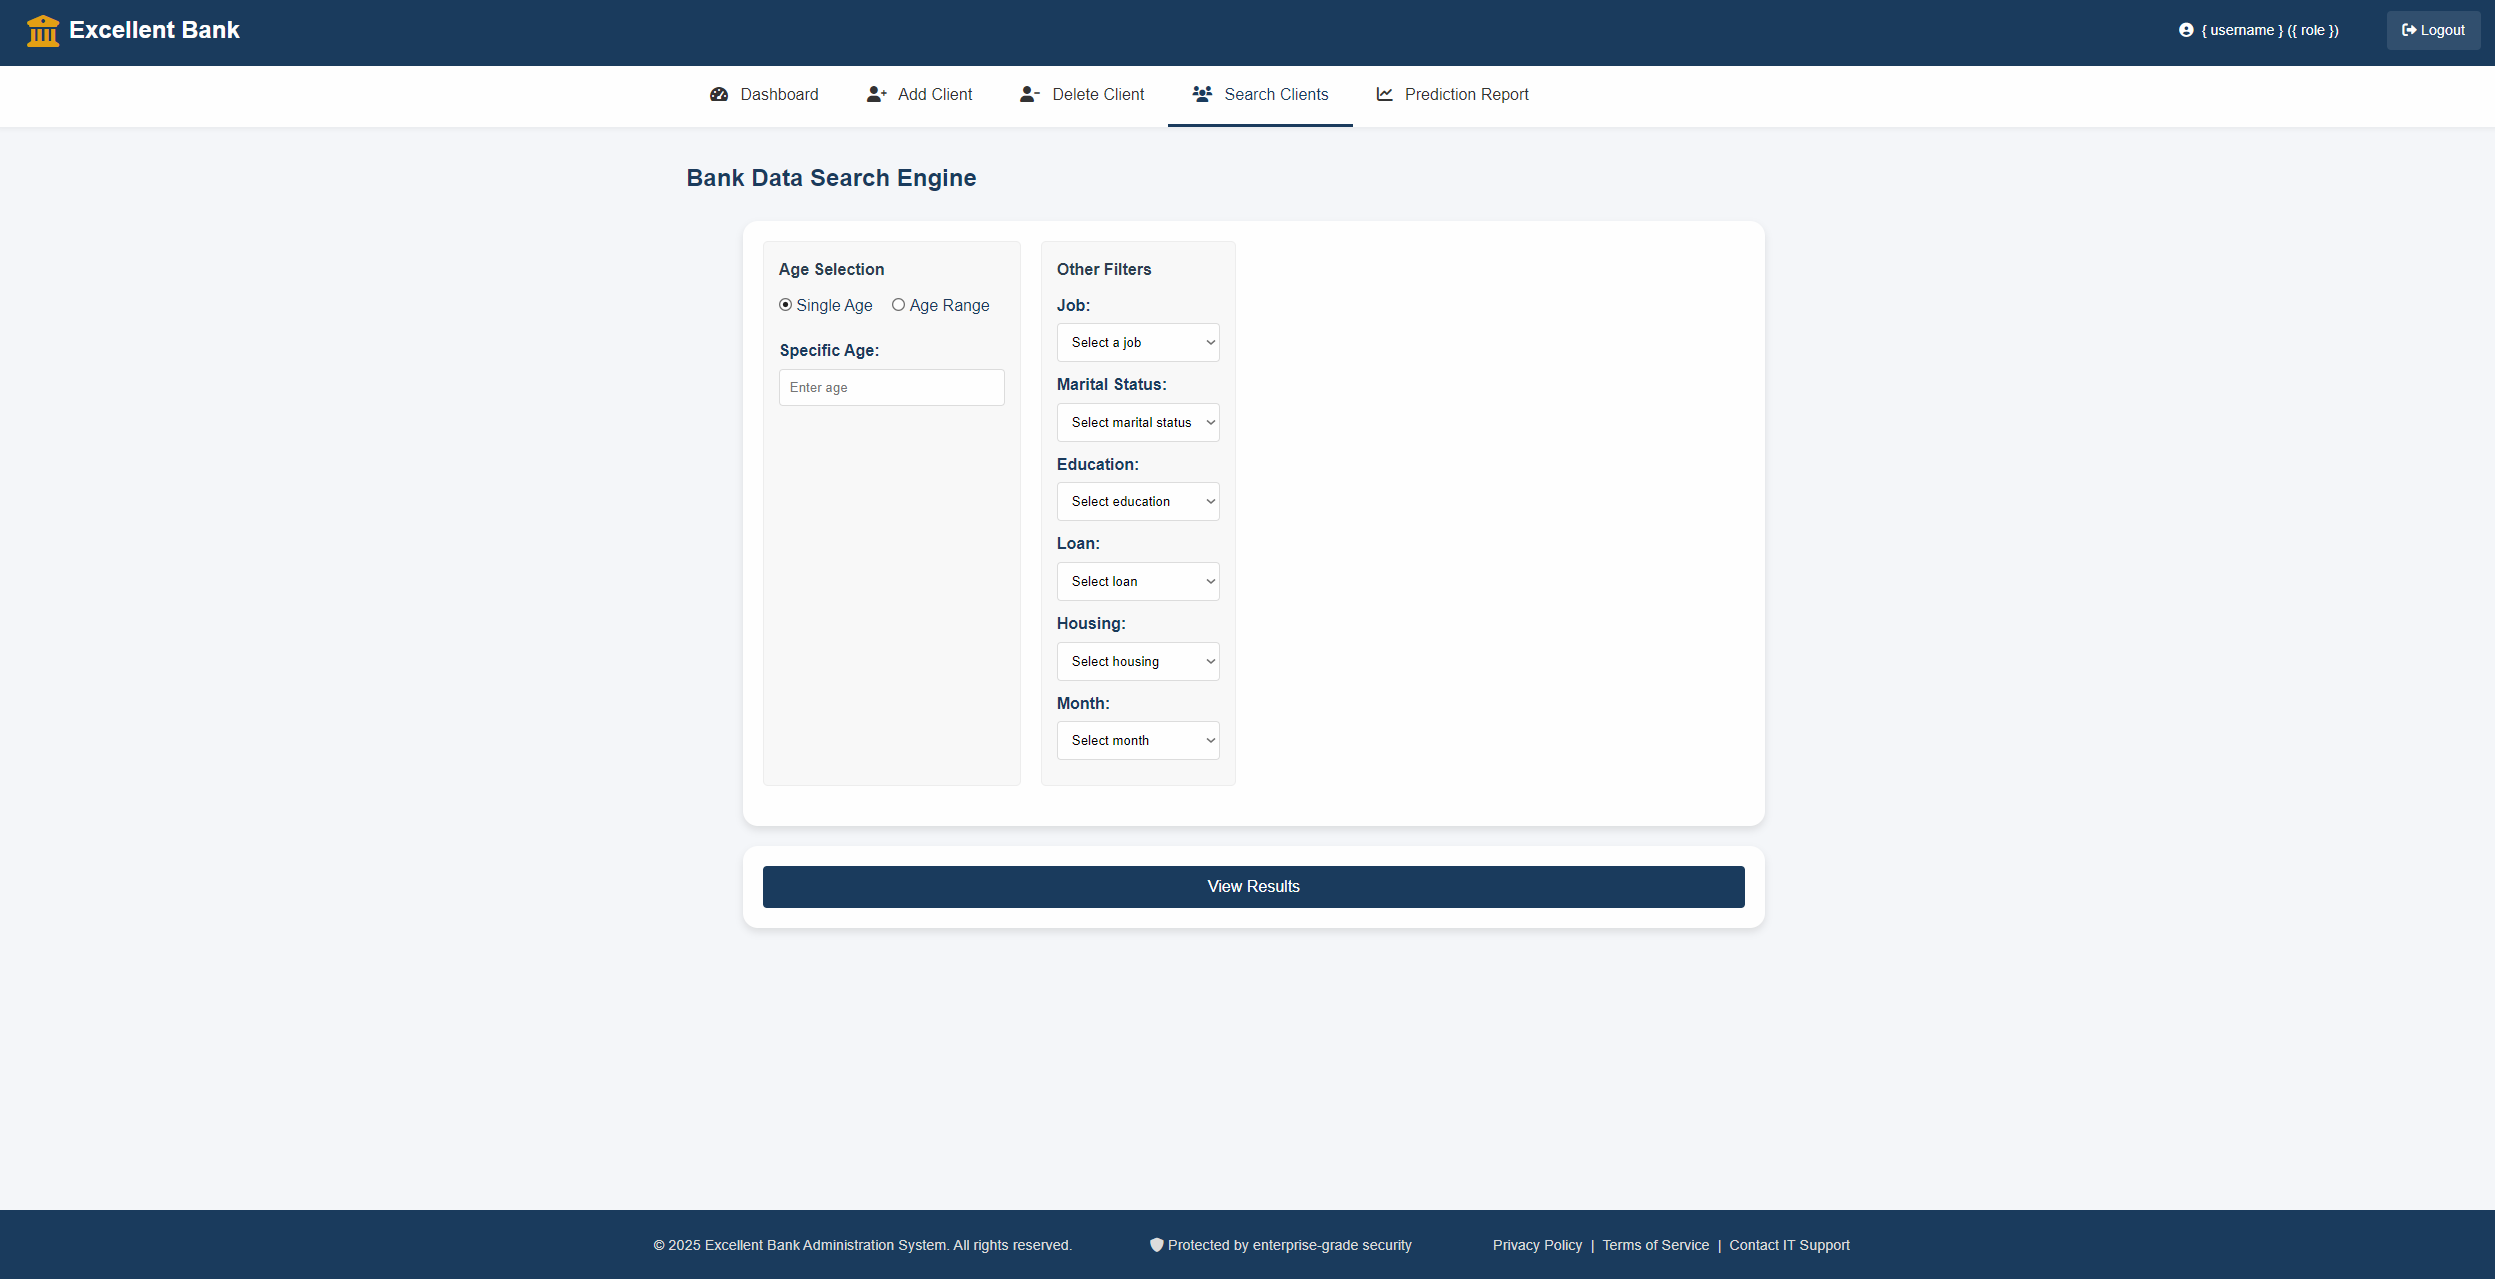

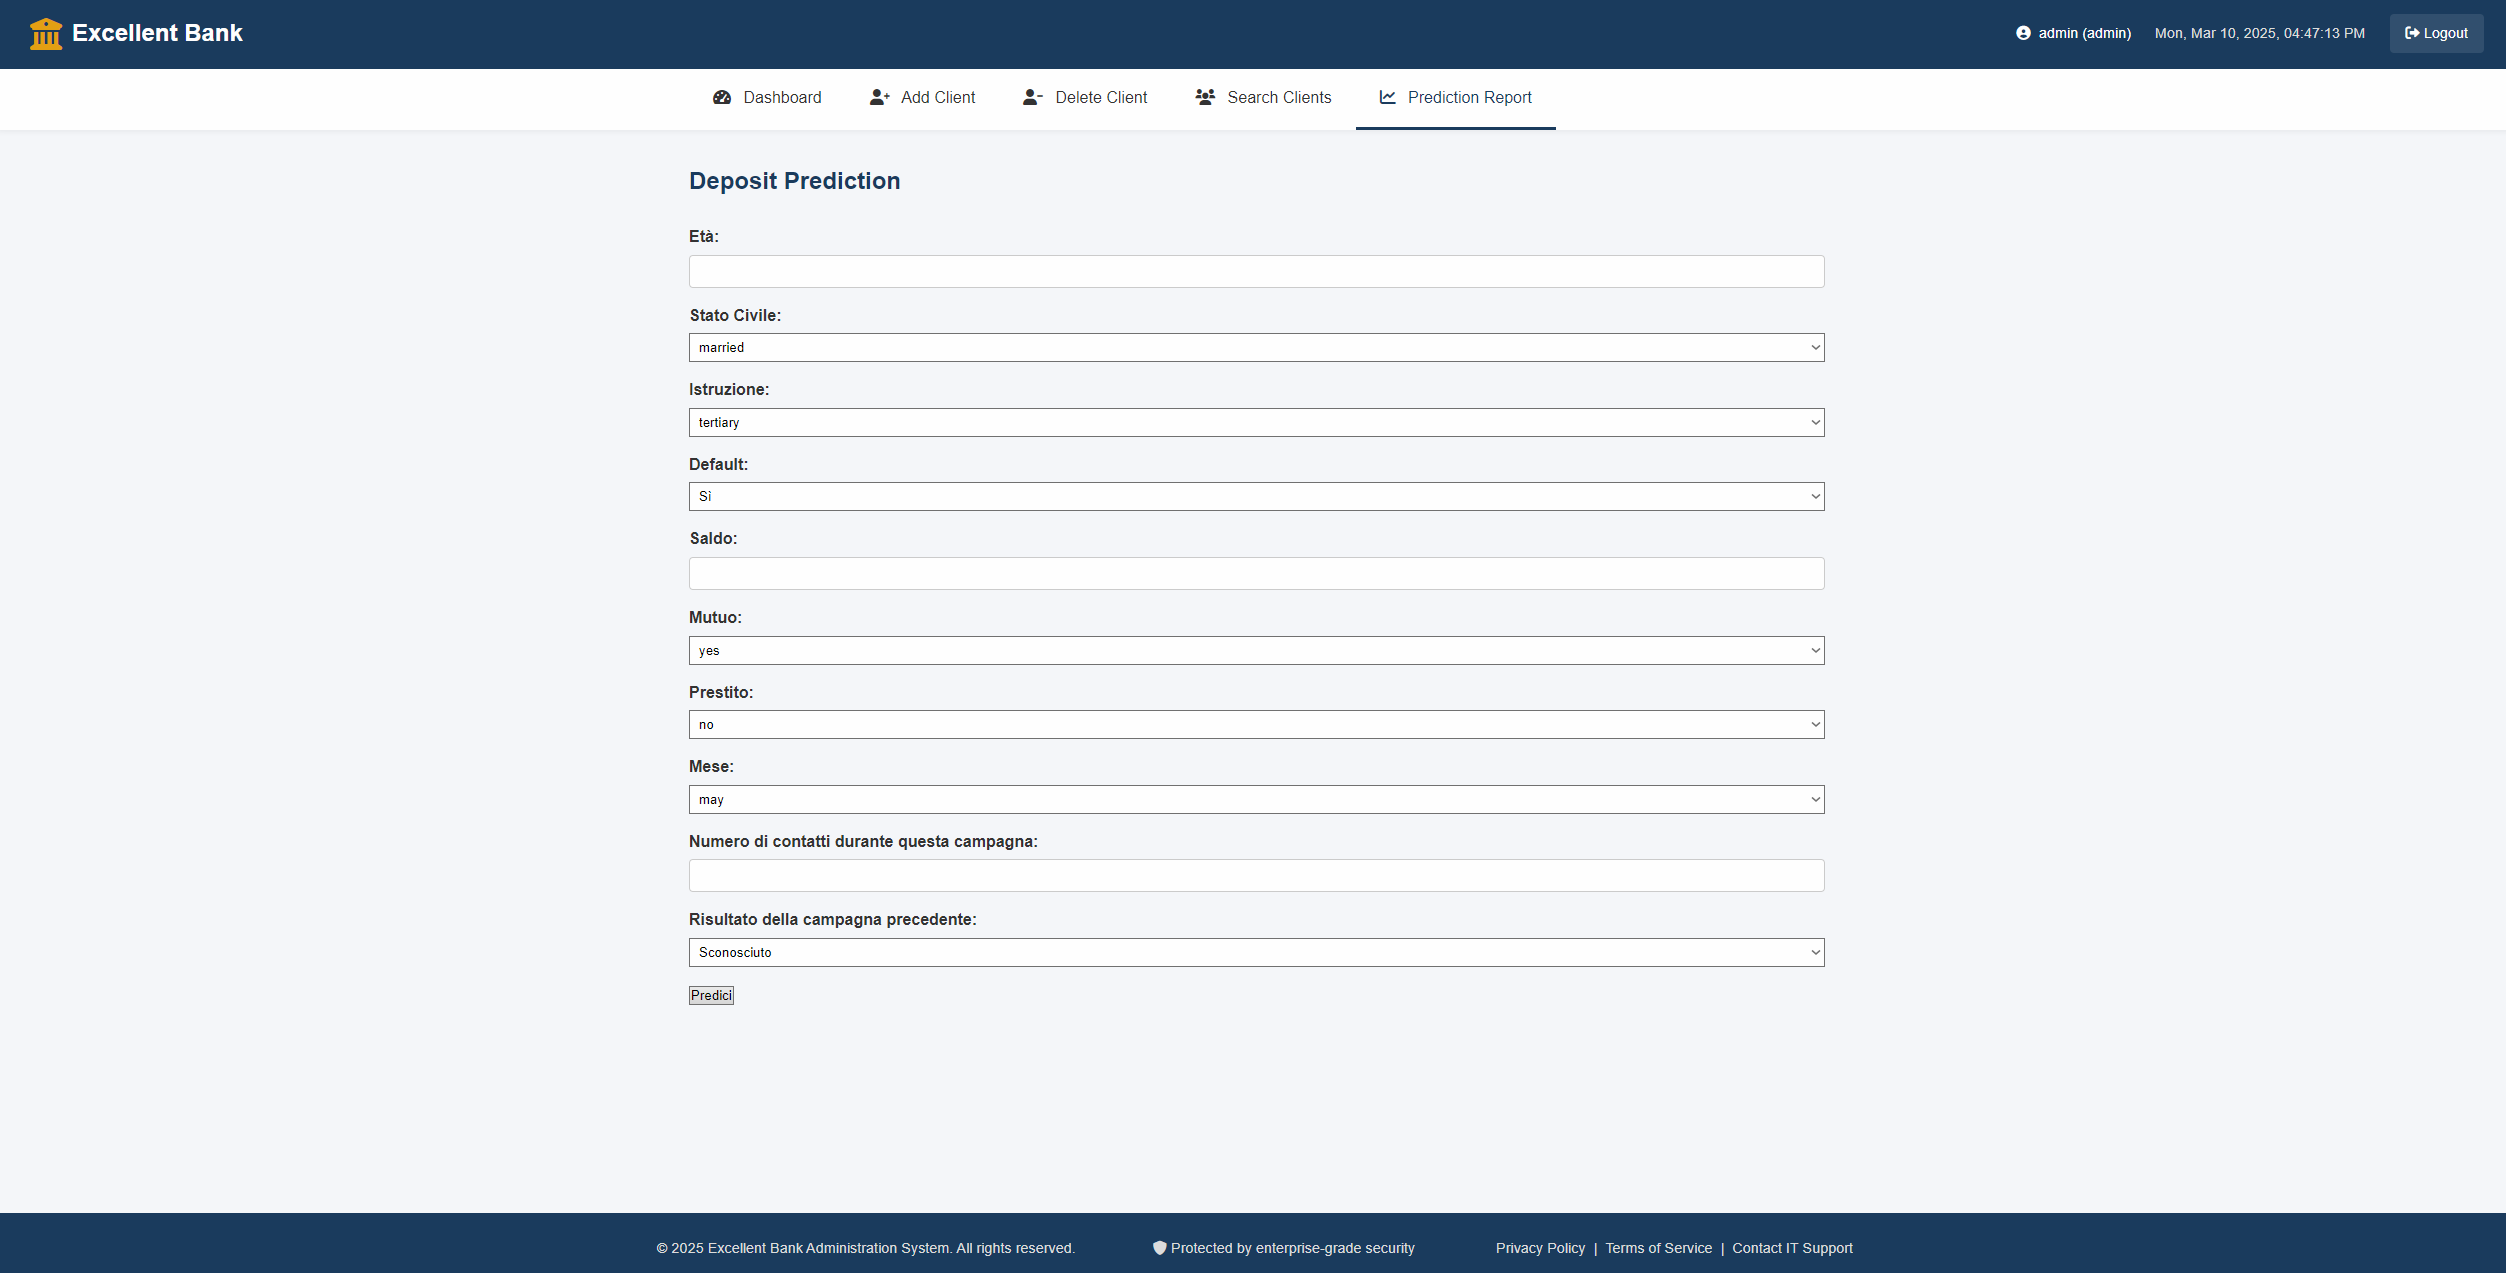

In [ ]:
#Hardcoded admin credentials (for demonstration purposes)
ADMIN_USERNAME = 'admin'
ADMIN_PASSWORD = 'password'

#Homepage route
@app.route('/', methods=['GET', 'POST'])
def login():
    if request.method == 'POST':
        username = request.form['username']
        password = request.form['password']

        #Check if credentials are correct
        if username == ADMIN_USERNAME and password == ADMIN_PASSWORD:
            return redirect(url_for('admin_dashboard')) #redirect to admin dashboard
        else:
            return "Invalid username or password"

    # Render the login page
    html = """
    <!DOCTYPE html>
    <html>
    <head>
        <title>Login</title>
        <style>
            body {
                font-family: Arial, sans-serif;
                background-color: #f5f5f5;
                display: flex;
                justify-content: center;
                align-items: center;
                height: 100vh;
                margin: 0;
            }
            .login-container {
                background-color: white;
                padding: 20px;
                border-radius: 8px;
                box-shadow: 0 2px 10px rgba(0,0,0,0.1);
                width: 300px;
                text-align: center;
            }
            input {
                width: 200px;
                padding: 10px;
                margin: 10px 0;
                border: 1px solid #ddd;
                border-radius: 4px;
            }
            button {
                width: 200px;
                padding: 10px;
                background-color: #3498db;
                color: white;
                border: none;
                border-radius: 4px;
                cursor: pointer;
            }
            button:hover {
                background-color: #2980b9;
            }
        </style>
    </head>
    <body>
        <div class="login-container">
            <h2>Admin Login</h2>
            <form method="POST">
                <input type="text" name="username" placeholder="Username" required>
                <input type="password" name="password" placeholder="Password" required>
                <button type="submit">Login</button>
            </form>
        </div>
    </body>
    </html>
    """

    return render_template_string(html)

#Admin page
@app.route('/admin')
def admin_dashboard():
    html = """
    <!DOCTYPE html>
    <html>
    <head>
        <title>Admin Dashboard</title>
        <style>
            /* Reuse the same CSS as the homepage */
            * {
                margin: 0;
                padding: 0;
                box-sizing: border-box;
                font-family: Arial, sans-serif;
            }
            body {
                font-family: Arial, sans-serif;
                background-color: #f5f5f5;
                display: flex;
                justify-content: center;
                align-items: center;
                height: 100vh;
                margin: 0;
            }
            .dashboard-container {
                background-color: white;
                padding: 20px;
                border-radius: 8px;
                box-shadow: 0 2px 10px rgba(0,0,0,0.1);
                width: 400px;
                text-align: center;
            }
            h1 {
                text-align: center;
                margin-bottom: 20px;
                color: #000000;
            }
            a {
                display: block;
                margin: 10px 0;
                padding: 10px;
                background-color: #3498db;
                color: white;
                text-decoration: none;
                border-radius: 4px;
            }
            a:hover {
                background-color: #2980b9;
            }

            .footer {
                margin-top: 30px;
                text-align: center;
                font-size: 15px;
                color: black;
            }

            .logout {
                background-color: #e74c3c;
            }
            .logout:hover {
                background-color: #c0392b;
            }
        </style>
    </head>
    <body>
        <div class="dashboard-container">
            <h2>Admin Dashboard</h2>
            <a href="/add-client">Add Client</a>
            <a href="/clientbank">Search Clients</a>
            <a href="/eliminate-client">Eliminate Client</a>
            <a href="/prediction_form">Prediction Form</a>
            <div class="footer">
                <a href="/" class="logout">Log out</a>
            </div>
        </div>
    </body>
    </html>
    """
    return render_template_string(html)

NameError: name 'app' is not defined

#Operazioni

##Gestione dei Clienti:
• Aggiungere nuovi clienti: L'applicazione permette di inserire nuovi clienti nel database, raccogliendo informazioni come nome, cognome, età, saldo e previsioni sui depositi.

• Eliminare clienti esistenti: È possibile rimuovere un cliente dal database in modo semplice e immediato.

• Cercare clienti: L'applicazione consente di cercare un cliente specifico in base al nome e al cognome, visualizzandone i dettagli memorizzati.

In [ ]:
#Add clients (non è completo Riccardo sta modificando)
@app.route('/add-client', methods=['GET', 'POST'])
def add_client():
    if request.method == "POST":
        try:
            # Ottieni i dati dal form
            new_client = {
                'age': request.form['age'],
                'job': request.form['job'],
                'marital': request.form['marital'],
                'education': request.form['education'],
                'default': request.form['default'],
                'balance': request.form['balance'],
                'housing': request.form['housing'],
                'loan': request.form['loan'],
                'contact': request.form['contact'],
                'day': request.form['day'],
                'month': request.form['month'],
                'duration': request.form['duration'],
                'campaign': request.form['campaign'],
                'pdays': request.form['pdays'],
                'previous': request.form['previous'],
                'poutcome': request.form['poutcome'],
                'deposit': request.form['deposit']
            }

            # Aggiorna il file CSV
            global df
            df = df._append(new_client, ignore_index=True)
            df.to_csv('Bank_Marketing.csv', sep=';', index=False)

            # Configurazione della connessione al database
            db_config = {
                'host': 'localhost',
                'user': 'root',  # Sostituisci con il tuo nome utente MySQL
                'password': '',  # Sostituisci con la tua password MySQL
                'database': 'bank_marketing'  # Sostituisci con il nome del tuo database
            }

            # Ottieni la connessione al database
            conn = mysql.connector.connect(**db_config)
            cursor = conn.cursor()

            try:
                # Ottieni l'ID del job e l'ID massimo + 1
                job_name = new_client['job']
                cursor.execute("SELECT id_job FROM jobs WHERE nome = %s", (job_name,))
                job_id = cursor.fetchone()[0]  # Recupera l'id del job

                cursor.execute("SELECT MAX(id_client) FROM client")
                id = cursor.fetchone()[0] or 0  # Ottieni l'ID massimo + 1, se non esiste setta a 0
                id += 1  # Incrementa l'ID per il nuovo client

                # Inserimento dei dati nelle tabelle
                insert_campaign = """
                    INSERT INTO campaigns (id_campaign, campaign, p_days, previous, p_outcome)
                    VALUES (%s, %s, %s, %s, %s)
                """
                values = (
                id, new_client['campaign'], new_client['pdays'], new_client['previous'], new_client['poutcome'])
                cursor.execute(insert_campaign, values)

                insert_contact_history = """
                    INSERT INTO contact_history (id_history, day_of_week, month, duration)
                    VALUES (%s, %s, %s, %s)
                """
                values = (id, new_client['day'], new_client['month'], new_client['duration'])
                cursor.execute(insert_contact_history, values)

                insert_deposit = """
                    INSERT INTO deposit (id_deposit, term_deposit) VALUES (%s, %s)
                """
                values = (id, new_client['deposit'])
                cursor.execute(insert_deposit, values)

                insert_wallet = """
                    INSERT INTO wallet (id_wallet, credit_default, balance, housing_loan, personal_loan)
                    VALUES (%s, %s, %s, %s, %s)
                """
                values = (
                id, new_client['default'], new_client['balance'], new_client['housing'], new_client['loan'])
                cursor.execute(insert_wallet, values)

                insert_client = """
                    INSERT INTO client (id_client, age, job_id, marital, education, contact, wallet_id, history_id, campaign_id, deposit_id)
                    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
                """
                values = (
                    id,
                    new_client['age'],
                    job_id,  # Usa l'ID numerico recuperato
                    new_client['marital'],
                    new_client['education'],
                    new_client['contact'],
                    id,  # wallet_id
                    id,  # history_id
                    id,  # campaign_id
                    id  # deposit_id
                )
                cursor.execute(insert_client, values)

                # Commit della transazione
                conn.commit()

            except mysql.connector.Error as err:
                conn.rollback()
                return "An error occurred while inserting data into the database", 500
                return redirect(url_for('add_client'))

            finally:
                cursor.close()
                conn.close()

            return redirect(url_for('success'))

        except Exception as e:
            return "An error occurred while processing the form data", 500

    # Render the add client form
    html = """
    <!DOCTYPE html>
    <html>
    <head>
        <title>Add Client</title>
        <style>
            body {
                font-family: system-ui, -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, Oxygen, Ubuntu, Cantarell, sans-serif;
                background-color: #f5f5f5;
                display: flex;
                justify-content: center;
                align-items: center;
                min-height: 100vh;
                margin: 0;
                padding: 20px;
            }
            .container {
                width: 100%;
                max-width: 900px;
            }
            h1 {
                color: #2c3e50;
                font-size: 36px;
                text-align: center;
                margin-bottom: 30px;
            }
            .form-section {
                background-color: #f9f9f9;
                border-radius: 10px;
                padding: 30px;
                margin-bottom: 20px;
                box-shadow: 0 1px 3px rgba(0,0,0,0.1);
            }
            .section-title {
                color: #2c3e50;
                font-size: 24px;
                margin-bottom: 20px;
                font-weight: 500;
            }
            .form-group {
                margin-bottom: 15px;
            }
            label {
                display: block;
                font-size: 18px;
                color: #333;
                margin-bottom: 5px;
                font-weight: 500;
            }
            input, select {
                width: 100%;
                padding: 10px;
                border: 1px solid #ddd;
                border-radius: 5px;
                font-size: 16px;
                box-sizing: border-box;
            }
            select {
                background-color: white;
                cursor: pointer;
            }
            .row {
                display: flex;
                flex-wrap: wrap;
                margin: 0 -10px;
            }
            .col {
                flex: 1;
                padding: 0 10px;
                min-width: 200px;
                margin-bottom: 15px;
            }
            .button-container {
                margin-top: 30px;
                text-align: center;
            }
            button {
                background-color: #3498db;
                color: white;
                border: none;
                padding: 12px 25px;
                font-size: 18px;
                border-radius: 5px;
                cursor: pointer;
                transition: background-color 0.3s;
            }
            button:hover {
                background-color: #2980b9;
            }
            @media (max-width: 768px) {
                .col {
                    flex: 100%;
                }
            }
        </style>
    </head>
    <body>
        <div class="container">
            <h1>Bank Data Add Client</h1>

            <form method="POST">
                <div class="form-section">
                    <h2 class="section-title">Personal Information</h2>
                    <div class="row">
                        <div class="col">
                            <div class="form-group">
                                <label for="age">Age:</label>
                                <input type="number" id="age" name="age" placeholder="Enter age" required>
                            </div>
                        </div>
                        <div class="col">
                            <div class="form-group">
                                <label for="job">Job:</label>
                                <select id="job" name="job" required>
                                    <option value="" disabled selected>Select a job</option>
                                    <option value="Admin">Admin</option>
                                    <option value="blue-collar">blue-collar</option>
                                    <option value="entrepreneur">entrepreneur</option>
                                    <option value="housemaid">housemaid</option>
                                    <option value="management">management</option>
                                    <option value="retired">retired</option>
                                    <option value="self-employed">self-employed</option>
                                    <option value="services">services</option>
                                    <option value="student">student</option>
                                    <option value="technician">technician</option>
                                    <option value="unemployed">unemployed</option>
                                    <option value="unknown">unknown</option>
                                </select>
                            </div>
                        </div>
                        <div class="col">
                            <div class="form-group">
                                <label for="marital">Marital Status:</label>
                                <select id="marital" name="marital" required>
                                    <option value="" disabled selected>Select marital status</option>
                                    <option value="divorced">Divorced</option>
                                    <option value="married">Married</option>
                                    <option value="single">Single</option>
                                    <option value="unknown">Unknown</option>
                                </select>
                            </div>
                        </div>
                    </div>
                    <div class="row">
                        <div class="col">
                            <div class="form-group">
                                <label for="education">Education:</label>
                                <select id="education" name="education" required>
                                    <option value="" disabled selected>Select education</option>
                                    <option value="primary">primary</option>
                                    <option value="secondary">secondary</option>
                                    <option value="tertiary">tertiary</option>
                                    <option value="unknown">unknown</option>
                                    <option value="other">other</option>
                                </select>
                            </div>
                        </div>
                    </div>
                </div>

                <div class="form-section">
                    <h2 class="section-title">Financial Information</h2>
                    <div class="row">
                        <div class="col">
                            <div class="form-group">
                                <label for="default">Default:</label>
                                <select id="default" name="default" required>
                                    <option value="" disabled selected>Select default status</option>
                                    <option value="0">No</option>
                                    <option value="1">Yes</option>
                                </select>
                            </div>
                        </div>
                        <div class="col">
                            <div class="form-group">
                                <label for="balance">Balance:</label>
                                <input type="number" id="balance" name="balance" placeholder="Enter balance" required>
                            </div>
                        </div>
                    </div>
                    <div class="row">
                        <div class="col">
                            <div class="form-group">
                                <label for="housing">Housing:</label>
                                <select id="housing" name="housing" required>
                                    <option value="" disabled selected>Select housing</option>
                                    <option value="0">No</option>
                                    <option value="1">Yes</option>
                                </select>
                            </div>
                        </div>
                        <div class="col">
                            <div class="form-group">
                                <label for="loan">Loan:</label>
                                <select id="loan" name="loan" required>
                                    <option value="" disabled selected>Select loan</option>
                                    <option value="0">No</option>
                                    <option value="1">Yes</option>
                                </select>
                            </div>
                        </div>
                    </div>
                </div>

                <div class="form-section">
                    <h2 class="section-title">Contact Information</h2>
                    <div class="row">
                        <div class="col">
                            <div class="form-group">
                                <label for="contact">Contact:</label>
                                <select id="contact" name="contact" required>
                                    <option value="" disabled selected>Select contact type</option>
                                    <option value="cellular">Cellular</option>
                                    <option value="telephone">Telephone</option>
                                    <option value="unknown">Unknown</option>
                                </select>
                            </div>
                        </div>
                        <div class="col">
                            <div class="form-group">
                                <label for="day">Day:</label>
                                <input type="number" id="day" name="day" placeholder="Enter day (1-31)" min="1" max="31" required>
                            </div>
                        </div>
                        <div class="col">
                            <div class="form-group">
                                <label for="month">Month:</label>
                                <select id="month" name="month" required>
                                    <option value="" disabled selected>Select month</option>
                                    <option value="jan">January</option>
                                    <option value="feb">February</option>
                                    <option value="mar">March</option>
                                    <option value="apr">April</option>
                                    <option value="may">May</option>
                                    <option value="jun">June</option>
                                    <option value="jul">July</option>
                                    <option value="aug">August</option>
                                    <option value="sep">September</option>
                                    <option value="oct">October</option>
                                    <option value="nov">November</option>
                                    <option value="dec">December</option>
                                </select>
                            </div>
                        </div>
                    </div>
                </div>

                <div class="form-section">
                    <h2 class="section-title">Campaign Information</h2>
                    <div class="row">
                        <div class="col">
                            <div class="form-group">
                                <label for="duration">Duration:</label>
                                <input type="number" id="duration" name="duration" placeholder="Enter duration" required>
                            </div>
                        </div>
                        <div class="col">
                            <div class="form-group">
                                <label for="campaign">Campaign:</label>
                                <input type="number" id="campaign" name="campaign" placeholder="Enter campaign" required>
                            </div>
                        </div>
                    </div>
                    <div class="row">
                        <div class="col">
                            <div class="form-group">
                                <label for="pdays">Pdays:</label>
                                <input type="number" id="pdays" name="pdays" placeholder="Enter pdays" required>
                            </div>
                        </div>
                        <div class="col">
                            <div class="form-group">
                                <label for="previous">Previous:</label>
                                <input type="number" id="previous" name="previous" placeholder="Enter previous" required>
                            </div>
                        </div>
                        <div class="col">
                            <div class="form-group">
                                <label for="poutcome">Poutcome:</label>
                                <select id="poutcome" name="poutcome" required>
                                    <option value="" disabled selected>Select poutcome</option>
                                    <option value="failure">Failure</option>
                                    <option value="nonexistent">Nonexistent</option>
                                    <option value="success">Success</option>
                                    <option value="unknown">Unknown</option>
                                </select>
                            </div>
                        </div>
                    </div>
                </div>

                <div class="form-section">
                    <h2 class="section-title">Deposit Information</h2>
                    <div class="row">
                        <div class="col">
                            <div class="form-group">
                                <label for="deposit">Deposit:</label>
                                <select id="deposit" name="deposit" required>
                                    <option value="" disabled selected>Select deposit</option>
                                    <option value="0">No</option>
                                    <option value="1">Yes</option>
                                </select>
                            </div>
                        </div>
                    </div>
                </div>

                <div class="button-container">
                    <button type="submit">Add Client</button>
                </div>
            </form>
        </div>
    </body>
    </html>
    """
    return render_template_string(html)
    if request.method == "POST":
        # Get form data
        new_client = {
            'age': request.form['age'],
            'job': request.form['job'],
            'marital': request.form['marital'],
            'education': request.form['education'],
            'default': request.form['default'],
            'balance': request.form['balance'],
            'housing': request.form['housing'],
            'loan': request.form['loan'],
            'contact': request.form['contact'],
            'day': request.form['day'],
            'month': request.form['month'],
            'duration': request.form['duration'],
            'campaign': request.form['campaign'],
            'pdays': request.form['pdays'],
            'previous': request.form['previous'],
            'poutcome': request.form['poutcome'],
            'deposit': request.form['deposit']
        }

        # Append the new client to the CSV file
        global df
        df = df._append(new_client, ignore_index=True)
        df.to_csv('Bank_Marketing.csv', sep=';', index=False)

        return redirect(url_for('admin_dashboard'))  # Redirect to admin dashboard

    # Render the add client form
    html = """
    <!DOCTYPE html>
    <html>
    <head>
        <title>Add Client</title>
        <style>
            body {
                font-family: system-ui, -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, Oxygen, Ubuntu, Cantarell, sans-serif;
                background-color: #f5f5f5;
                display: flex;
                justify-content: center;
                align-items: center;
                min-height: 100vh;
                margin: 0;
                padding: 20px;
            }
            .container {
                width: 100%;
                max-width: 900px;
            }
            h1 {
                color: #2c3e50;
                font-size: 36px;
                text-align: center;
                margin-bottom: 30px;
            }
            .form-section {
                background-color: #f9f9f9;
                border-radius: 10px;
                padding: 30px;
                margin-bottom: 20px;
                box-shadow: 0 1px 3px rgba(0,0,0,0.1);
            }
            .section-title {
                color: #2c3e50;
                font-size: 24px;
                margin-bottom: 20px;
                font-weight: 500;
            }
            .form-group {
                margin-bottom: 15px;
            }
            label {
                display: block;
                font-size: 18px;
                color: #333;
                margin-bottom: 5px;
                font-weight: 500;
            }
            input, select {
                width: 100%;
                padding: 10px;
                border: 1px solid #ddd;
                border-radius: 5px;
                font-size: 16px;
                box-sizing: border-box;
            }
            select {
                background-color: white;
                cursor: pointer;
            }
            .row {
                display: flex;
                flex-wrap: wrap;
                margin: 0 -10px;
            }
            .col {
                flex: 1;
                padding: 0 10px;
                min-width: 200px;
                margin-bottom: 15px;
            }
            .button-container {
                margin-top: 30px;
                text-align: center;
            }
            button {
                background-color: #3498db;
                color: white;
                border: none;
                padding: 12px 25px;
                font-size: 18px;
                border-radius: 5px;
                cursor: pointer;
                transition: background-color 0.3s;
            }
            button:hover {
                background-color: #2980b9;
            }
            @media (max-width: 768px) {
                .col {
                    flex: 100%;
                }
            }
        </style>
    </head>
    <body>
        <div class="container">
            <h1>Bank Data Add Client</h1>

            <form method="POST">
                <div class="form-section">
                    <h2 class="section-title">Personal Information</h2>
                    <div class="row">
                        <div class="col">
                            <div class="form-group">
                                <label for="age">Age:</label>
                                <input type="number" id="age" name="age" placeholder="Enter age" required>
                            </div>
                        </div>
                        <div class="col">
                            <div class="form-group">
                                <label for="job">Job:</label>
                                <select id="job" name="job" required>
                                    <option value="" disabled selected>Select a job</option>
                                    <option value="admin.">Administrator</option>
                                    <option value="blue-collar">Blue Collar</option>
                                    <option value="entrepreneur">Entrepreneur</option>
                                    <option value="housemaid">Housemaid</option>
                                    <option value="management">Management</option>
                                    <option value="retired">Retired</option>
                                    <option value="self-employed">Self-employed</option>
                                    <option value="services">Services</option>
                                    <option value="student">Student</option>
                                    <option value="technician">Technician</option>
                                    <option value="unemployed">Unemployed</option>
                                    <option value="unknown">Unknown</option>
                                </select>
                            </div>
                        </div>
                        <div class="col">
                            <div class="form-group">
                                <label for="marital">Marital Status:</label>
                                <select id="marital" name="marital" required>
                                    <option value="" disabled selected>Select marital status</option>
                                    <option value="divorced">Divorced</option>
                                    <option value="married">Married</option>
                                    <option value="single">Single</option>
                                    <option value="unknown">Unknown</option>
                                </select>
                            </div>
                        </div>
                    </div>
                    <div class="row">
                        <div class="col">
                            <div class="form-group">
                                <label for="education">Education:</label>
                                <select id="education" name="education" required>
                                    <option value="" disabled selected>Select education</option>
                                    <option value="basic.4y">Basic (4y)</option>
                                    <option value="basic.6y">Basic (6y)</option>
                                    <option value="basic.9y">Basic (9y)</option>
                                    <option value="high.school">High School</option>
                                    <option value="illiterate">Illiterate</option>
                                    <option value="professional.course">Professional Course</option>
                                    <option value="university.degree">University Degree</option>
                                    <option value="unknown">Unknown</option>
                                </select>
                            </div>
                        </div>
                    </div>
                </div>

                <div class="form-section">
                    <h2 class="section-title">Financial Information</h2>
                    <div class="row">
                        <div class="col">
                            <div class="form-group">
                                <label for="default">Default:</label>
                                <select id="default" name="default" required>
                                    <option value="" disabled selected>Select default status</option>
                                    <option value="no">No</option>
                                    <option value="yes">Yes</option>
                                    <option value="unknown">Unknown</option>
                                </select>
                            </div>
                        </div>
                        <div class="col">
                            <div class="form-group">
                                <label for="balance">Balance:</label>
                                <input type="number" id="balance" name="balance" placeholder="Enter balance" required>
                            </div>
                        </div>
                    </div>
                    <div class="row">
                        <div class="col">
                            <div class="form-group">
                                <label for="housing">Housing:</label>
                                <select id="housing" name="housing" required>
                                    <option value="" disabled selected>Select housing</option>
                                    <option value="no">No</option>
                                    <option value="yes">Yes</option>
                                    <option value="unknown">Unknown</option>
                                </select>
                            </div>
                        </div>
                        <div class="col">
                            <div class="form-group">
                                <label for="loan">Loan:</label>
                                <select id="loan" name="loan" required>
                                    <option value="" disabled selected>Select loan</option>
                                    <option value="no">No</option>
                                    <option value="yes">Yes</option>
                                    <option value="unknown">Unknown</option>
                                </select>
                            </div>
                        </div>
                    </div>
                </div>

                <div class="form-section">
                    <h2 class="section-title">Contact Information</h2>
                    <div class="row">
                        <div class="col">
                            <div class="form-group">
                                <label for="contact">Contact:</label>
                                <select id="contact" name="contact" required>
                                    <option value="" disabled selected>Select contact type</option>
                                    <option value="cellular">Cellular</option>
                                    <option value="telephone">Telephone</option>
                                    <option value="unknown">Unknown</option>
                                </select>
                            </div>
                        </div>
                        <div class="col">
                            <div class="form-group">
                                <label for="day">Day:</label>
                                <input type="number" id="day" name="day" placeholder="Enter day (1-31)" min="1" max="31" required>
                            </div>
                        </div>
                        <div class="col">
                            <div class="form-group">
                                <label for="month">Month:</label>
                                <select id="month" name="month" required>
                                    <option value="" disabled selected>Select month</option>
                                    <option value="jan">January</option>
                                    <option value="feb">February</option>
                                    <option value="mar">March</option>
                                    <option value="apr">April</option>
                                    <option value="may">May</option>
                                    <option value="jun">June</option>
                                    <option value="jul">July</option>
                                    <option value="aug">August</option>
                                    <option value="sep">September</option>
                                    <option value="oct">October</option>
                                    <option value="nov">November</option>
                                    <option value="dec">December</option>
                                </select>
                            </div>
                        </div>
                    </div>
                </div>

                <div class="form-section">
                    <h2 class="section-title">Campaign Information</h2>
                    <div class="row">
                        <div class="col">
                            <div class="form-group">
                                <label for="duration">Duration:</label>
                                <input type="number" id="duration" name="duration" placeholder="Enter duration" required>
                            </div>
                        </div>
                        <div class="col">
                            <div class="form-group">
                                <label for="campaign">Campaign:</label>
                                <input type="number" id="campaign" name="campaign" placeholder="Enter campaign" required>
                            </div>
                        </div>
                    </div>
                    <div class="row">
                        <div class="col">
                            <div class="form-group">
                                <label for="pdays">Pdays:</label>
                                <input type="number" id="pdays" name="pdays" placeholder="Enter pdays" required>
                            </div>
                        </div>
                        <div class="col">
                            <div class="form-group">
                                <label for="previous">Previous:</label>
                                <input type="number" id="previous" name="previous" placeholder="Enter previous" required>
                            </div>
                        </div>
                        <div class="col">
                            <div class="form-group">
                                <label for="poutcome">Poutcome:</label>
                                <select id="poutcome" name="poutcome" required>
                                    <option value="" disabled selected>Select poutcome</option>
                                    <option value="failure">Failure</option>
                                    <option value="nonexistent">Nonexistent</option>
                                    <option value="success">Success</option>
                                    <option value="unknown">Unknown</option>
                                </select>
                            </div>
                        </div>
                    </div>
                </div>

                <div class="form-section">
                    <h2 class="section-title">Deposit Information</h2>
                    <div class="row">
                        <div class="col">
                            <div class="form-group">
                                <label for="deposit">Deposit:</label>
                                <select id="deposit" name="deposit" required>
                                    <option value="" disabled selected>Select deposit</option>
                                    <option value="no">No</option>
                                    <option value="yes">Yes</option>
                                </select>
                            </div>
                        </div>
                    </div>
                </div>

                <div class="button-container">
                    <button type="submit">Add Client</button>
                </div>
            </form>
        </div>
    </body>
    </html>
    """
    return render_template_string(html)

#Eliminate clients
@app.route('/eliminate-client', methods=['GET', 'POST'])
def eliminate_client():
    if request.method == 'POST':
        id_client = request.form.get('id_client')

        try:
            # Connessione al database
            conn = mysql.connector.connect(
                host="localhost",
                user="root",
                password="",
                database="bank_marketing"
            )
            cursor = conn.cursor()

            # Verifica se il cliente esiste
            check_query = "SELECT wallet_id, history_id, campaign_id, deposit_id FROM client WHERE id_client = %s"
            cursor.execute(check_query, (id_client,))
            result = cursor.fetchone()

            if result:
                wallet_id, history_id, campaign_id, deposit_id = result

                # Eliminare i dati collegati nelle altre tabelle
                cursor.execute("DELETE FROM wallet WHERE id_wallet = %s", (wallet_id,))
                cursor.execute("DELETE FROM contact_history WHERE id_history = %s", (history_id,))
                cursor.execute("DELETE FROM campaigns WHERE id_campaign = %s", (campaign_id,))
                cursor.execute("DELETE FROM deposit WHERE id_deposit = %s", (deposit_id,))

                # Ora elimina il cliente
                cursor.execute("DELETE FROM client WHERE id_client = %s", (id_client,))

                # Commit delle modifiche
                conn.commit()

                cursor.close()
                conn.close()

                return redirect(url_for('admin_dashboard'))
            else:
                cursor.close()
                conn.close()
                return "Nessun cliente trovato con i criteri specificati"

        except mysql.connector.Error as err:
            return f"Errore database: {err}"
        except Exception as e:
            return f"Errore generale: {e}"

    # Per richieste GET, potresti voler mostrare un form

    # Render the eliminate client form
    html = """
    <!DOCTYPE html>
    <html>
    <head>
        <title>Eliminate Client</title>
        <style>
            body {
                font-family: Arial, sans-serif;
                background-color: #f5f5f5;
                display: flex;
                justify-content: center;
                align-items: center;
                height: 100vh;
                margin: 0;
            }
            .form-container {
                background-color: white;
                padding: 20px;
                border-radius: 8px;
                box-shadow: 0 2px 10px rgba(0,0,0,0.1);
                width: 300px;
                text-align: center;
            }
            input, select {
                width: 200px;
                padding: 10px;
                margin: 10px 0;
                border: 1px solid #ddd;
                border-radius: 4px;
            }
            button {
                width: 200px;
                padding: 10px;
                background-color: #3498db;
                color: white;
                border: none;
                border-radius: 4px;
                cursor: pointer;
            }
            button:hover {
                background-color: #2980b9;
            }
        </style>
    </head>
    <body>
        <div class="form-container">
            <h2>Eliminate Client</h2>
            <form method="POST">
                <input type="number" name="id_client" placeholder="id" required>
                <button type="submit">Eliminate Client</button>
            </form>
        </div>
    </body>
    </html>
    """

    return render_template_string(html)

#Search clients
@app.route('/search', methods=['GET'])
def search():
    # Get filter parameters from the URL query string
    age_type = request.args.get('age_type', 'single')
    age = request.args.get('age')
    age_range = request.args.get('age_range')
    job = request.args.get('job')
    marital = request.args.get('marital')
    education = request.args.get('education')
    loan = request.args.get('loan')
    housing = request.args.get('housing')
    month = request.args.get('month')

    # Filter the dataset based on the provided parameters
    filtered_data = df

    # Apply age filter based on age type
    if age_type == 'single' and age:
        filtered_data = filtered_data[filtered_data['age'] == int(age)]
    elif age_type == 'range' and age_range:
        # Parse the age range
        if age_range == '90+':
            min_age = 90
            max_age = 150  # Assuming no one is older than 150
        else:
            min_age, max_age = map(int, age_range.split('-'))
        filtered_data = filtered_data[(filtered_data['age'] >= min_age) & (filtered_data['age'] < max_age)]

    if job:
        filtered_data = filtered_data[filtered_data['job'] == job]
    if marital:
        filtered_data = filtered_data[filtered_data['marital'] == marital]
    if education:
        filtered_data = filtered_data[filtered_data['education'] == education]
    if loan:
        filtered_data = filtered_data[filtered_data['loan'] == loan]
    if housing:
        filtered_data = filtered_data[filtered_data['housing'] == housing]
    if month:
        filtered_data = filtered_data[filtered_data['month'] == month]

    # Check if filtered data is empty
    if filtered_data.empty:
        return "No data found matching your criteria."

    # Generate the graphs based on age type
    try:
        graph_url = generate_graphs(filtered_data, age_type)
    except Exception as e:
        return f"An error occurred while generating the graphs: {str(e)}"

    # Generate the statement
    statement = generate_statement(filtered_data, age, age_range, job, marital, education, loan, housing, month)

    # Convert the filtered data to an HTML table
    data_html = filtered_data.to_html(classes='data', index=False)

    # HTML and CSS for the search results page
    html = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <title>Search Results</title>
        <style>
            /* Reuse the same CSS as the homepage */
            * {{
                margin: 0;
                padding: 0;
                box-sizing: border-box;
                font-family: Arial, sans-serif;
            }}

            body {{
                background-color: #f5f5f5;
                color: #333;
                line-height: 1.6;
                padding: 20px;
                display: flex;
                justify-content: center;
                align-items: center;
                flex-direction: column;
                min-height: 100vh;
            }}

            .container {{
                max-width: 1200px;
                width: 100%;
                background-color: white;
                padding: 30px;
                border-radius: 8px;
                box-shadow: 0 2px 10px rgba(0,0,0,0.1);
            }}

            h1 {{
                text-align: center;
                margin-bottom: 20px;
                color: #2c3e50;
            }}

            table {{
                width: 100%;
                border-collapse: collapse;
                margin-top: 20px;
                display: none; /* Hide the table */
            }}

            table, th, td {{
                border: 1px solid #ddd;
            }}

            th, td {{
                padding: 10px;
                text-align: center;
                background-color: #f5f5f5;
                color: #ffffff;
            }}

            td {{
                color: #000000;
            }}

            th {{
                background-color: #437DFA;
            }}

            footer {{
                margin-top: 30px;
                text-align: center;
                font-size: 0.9em;
                color: #7f8c8d;
            }}

            a {{
                display: inline-block;
                margin-top: 20px;
                color: #3498db;
                text-decoration: none;
            }}

            a:hover {{
                text-decoration: underline;
            }}

            .graph {{
                margin-bottom: 20px;
                text-align: center;
            }}

            .graph-container {{
                display: flex;
                justify-content: center;
                align-items: center;
                flex-direction: column;
                width: 100%;
            }}

            .statement {{
                text-align: center;
                font-size: 1.2em;
                color: #2c3e50;
                margin-bottom: 40px;
            }}

        </style>
    </head>
    <body>
        <div class="container">
            <h1>Search Results</h1>
            <div class="graph-container">
                <div class="graph">
                    <img src="data:image/png;base64,{graph_url}" alt="Client Balances and Deposit Distribution">
                </div>
            </div>
            <div class="statement" style="white-space: pre-line;">
                {statement}
            </div>
            {data_html} <!-- Table is still in the HTML but hidden -->
            <a href="/admin">Back to Search</a>
            <footer>
                <p>Created with Flask - A Python Web Framework</p>
            </footer>
        </div>
    </body>
    </html>
    """
    return render_template_string(html)

##Previsioni e Calcoli:
L'applicazione è in grado di calcolare, in base ai dettagli del cliente (come età, saldo e storico), una previsione sulla probabilità che il cliente effettui un deposito. Questa previsione viene espressa in percentuale, fornendo un'indicazione utile per decisioni future.

In [ ]:
#The prediction form
@app.route('/prediction_form')
def prediction_form():
    # Get unique values for job, marital status, education, etc.
    job_options = df['job'].unique().tolist()
    marital_options = df['marital'].unique().tolist()
    education_options = df['education'].unique().tolist()
    loan_options = df['loan'].unique().tolist()
    housing_options = df['housing'].unique().tolist()
    month_options = df['month'].unique().tolist()

    html = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <title>Customer Deposit Forecast</title>
        <style>
            * {{
                margin: 0;
                padding: 0;
                box-sizing: border-box;
                font-family: Arial, sans-serif;
            }}

            body {{
                background-color: #f5f5f5;
                color: #333;
                line-height: 1.6;
                padding: 20px;
            }}

            .container {{
                max-width: 800px;
                margin: 0 auto;
                background-color: white;
                padding: 30px;
                border-radius: 8px;
                box-shadow: 0 2px 10px rgba(0,0,0,0.1);
            }}

            h1 {{
                text-align: center;
                margin-bottom: 20px;
                color: #2c3e50;
            }}

            form {{
                margin-bottom: 20px;
            }}

            .form-group {{
                margin-bottom: 15px;
            }}

            label {{
                display: block;
                margin-bottom: 5px;
                font-weight: bold;
            }}

            input[type="number"], select {{
                width: 100%;
                padding: 10px;
                border: 1px solid #ddd;
                border-radius: 4px;
            }}

            button {{
                display: block;
                width: 100%;
                padding: 10px;
                background-color: #3498db;
                color: white;
                border: none;
                border-radius: 4px;
                cursor: pointer;
                margin-top: 20px;
            }}

            button:hover {{
                background-color: #2980b9;
            }}

            .result {{
                margin-top: 20px;
                padding: 15px;
                background-color: #f8f9fa;
                border: 1px solid #ddd;
                border-radius: 4px;
            }}

            a {{
                display: block;
                margin-top: 20px;
                text-align: center;
                color: #3498db;
                text-decoration: none;
            }}

            a:hover {{
                text-decoration: underline;
            }}
        </style>
    </head>
    <body>
        <div class="container">
            <h1>Customer Deposit Forecast</h1>
            <form action="/predict_single" method="post">
                <div class="form-group">
                    <label for="age">Age:</label>
                    <input type="number" id="age" name="age" required>
                </div>

                <div class="form-group">
                    <label for="job">Job:</label>
                    <select id="job" name="job" required>
                        {"".join(f'<option value="{job}">{job}</option>' for job in job_options)}
                    </select>
                </div>

                <div class="form-group">
                    <label for="marital">Marital:</label>
                    <select id="marital" name="marital" required>
                        {"".join(f'<option value="{marital}">{marital}</option>' for marital in marital_options)}
                    </select>
                </div>

                <div class="form-group">
                    <label for="education">Education:</label>
                    <select id="education" name="education" required>
                        {"".join(f'<option value="{education}">{education}</option>' for education in education_options)}
                    </select>
                </div>

                <div class="form-group">
                    <label for="default">Default:</label>
                    <select id="default" name="default" required>
                        <option value="yes">Sì</option>
                        <option value="no">No</option>
                    </select>
                </div>

                <div class="form-group">
                    <label for="balance">Balance:</label>
                    <input type="number" id="balance" name="balance" required>
                </div>

                <div class="form-group">
                    <label for="housing">Housing:</label>
                    <select id="housing" name="housing" required>
                        {"".join(f'<option value="{housing}">{housing}</option>' for housing in housing_options)}
                    </select>
                </div>

                <div class="form-group">
                    <label for="loan">Loan:</label>
                    <select id="loan" name="loan" required>
                        {"".join(f'<option value="{loan}">{loan}</option>' for loan in loan_options)}
                    </select>
                </div>

                <div class="form-group">
                    <label for="month">Month:</label>
                    <select id="month" name="month" required>
                        {"".join(f'<option value="{month}">{month}</option>' for month in month_options)}
                    </select>
                </div>

                <div class="form-group">
                    <label for="campaign">Number of contacts during the campaign:</label>
                    <input type="number" id="campaign" name="campaign" required>
                </div>

                <div class="form-group">
                    <label for="poutcome">Result of the previous campaign:</label>
                    <select id="poutcome" name="poutcome" required>
                        <option value="unknown">Sconosciuto</option>
                        <option value="failure">Fallimento</option>
                        <option value="success">Successo</option>
                    </select>
                </div>

                <button type="submit">Predict</button>
            </form>

            <a href="/admin">Return to Search</a>
            <a href="/download">Download All Forecasts</a>
        </div>
    </body>
    </html>
    """
    return render_template_string(html)

##Interfaccia Utente (UI):
L'interfaccia utente è stata sviluppata utilizzando HTML per la struttura e CSS per lo stile, implementando il codice alla logica di backend (Python) per gestire le operazioni richieste.